In [1]:
import torch
import torch.nn as nn

In [8]:
t = nn.Conv2d(768, 768, kernel_size=14, groups=768, padding="same")

In [12]:
t(torch.randn((1, 768, 14, 14))).round()

tensor([[[[ 0., -0., -0.,  ...,  0., -0.,  0.],
          [ 0.,  0., -1.,  ..., -1.,  0.,  0.],
          [ 0., -0.,  0.,  ...,  0.,  0.,  0.],
          ...,
          [-0., -0.,  0.,  ..., -0., -0., -1.],
          [-0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [-0., -0., -0.,  ..., -0.,  0., -0.]],

         [[ 0.,  0.,  0.,  ..., -0., -0., -0.],
          [ 0.,  1., -0.,  ..., -0., -0., -0.],
          [-0.,  1., -0.,  ...,  0.,  0.,  0.],
          ...,
          [-0.,  0., -1.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0., -0., -0.],
          [ 1., -0., -0.,  ...,  1., -0., -0.]],

         [[-1., -0.,  1.,  ...,  0.,  0., -0.],
          [ 0.,  0., -0.,  ...,  0.,  0., -0.],
          [-0., -0., -0.,  ...,  1.,  0., -0.],
          ...,
          [ 0.,  1., -1.,  ...,  0.,  0., -0.],
          [-0.,  0., -0.,  ..., -0., -0.,  0.],
          [ 1.,  0.,  0.,  ...,  0.,  0.,  0.]],

         ...,

         [[ 0.,  1.,  1.,  ...,  0., -0.,  0.],
          [ 0.,  0.,  

In [ ]:
# !pip install pretrainedmodels==0.7.4
# !pip install efficientnet-pytorch==0.6.3
# !pip install timm==0.3.2

In [ ]:
# # CUDA 11.1
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# RMSE -> MAE Loss 꿀팁!!

In [1]:
!nvidia-smi

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

Thu Jan  6 03:47:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:18:00.0 Off |                  Off |
| 37%   62C    P2   254W / 260W |  48122MiB / 48601MiB |     98%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro RTX 8000     On   | 00000000:3B:00.0 Off |                  Off |
| 33%   

In [2]:
cd /workspace/sunggu/4.Dose_img2img/scripts study

/workspace/sunggu/4.Dose_img2img/scripts study


In [3]:
import torch
print(torch.__version__)

1.8.0+cu111


In [4]:
import multiprocessing
print("CPU 갯수 = ", multiprocessing.cpu_count())

CPU 갯수 =  48


# Revised_UNet

In [6]:
!python train.py \
--batch-size 192 \
--epochs 1000 \
--lr_scheduler "cosine_annealing_warm_restart" \
--lr 1e-6 \
--data-set 'Sinogram_DCM' \
--model-name 'Revised_UNet' \
--criterion 'Perceptual+L1 Loss' \
--output_dir '/workspace/sunggu/4.Dose_img2img/model/[Ours]Revised_UNet' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/' \
--validate-every 1 \
--num_workers 16 \
--criterion_mode 'single label' \
--multiple_GT "False" \
--patch_training "True" \
--multi-gpu-mode 'DataParallel' 


***********************************************
***********************************************
Dataset Name:  Sinogram_DCM
---------- Model ----------
Resume From:  
Output To:  /workspace/sunggu/4.Dose_img2img/model/[Ours]Revised_UNet
Save   To:  /workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/
---------- Optimizer ----------
Learning Rate:  1e-06
Batchsize:  192
Loading dataset ....
Train [Total]  number =  6899
Valid [Total]  number =  14
Creating criterion: Perceptual+L1 Loss
Creating model: Revised_UNet
Number of Learnable Params: 24766601
Revised_UNet(
  (enc1_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (enc1_2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (pool1): DownsampleBlock(
    (downsample): Sequential(
      (0): PixelUnshuffle(downscale_factor=2)
      (1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 

Train: [epoch:3]  [10/35]  eta: 0:01:54  lr: 0.000201  loss: 0.0409 (0.0409)  time: 4.5786  data: 0.9087  max mem: 39988
Train: [epoch:3]  [20/35]  eta: 0:01:02  lr: 0.000201  loss: 0.0381 (0.0391)  time: 3.6813  data: 0.0002  max mem: 39988
Train: [epoch:3]  [30/35]  eta: 0:00:20  lr: 0.000201  loss: 0.0366 (0.0382)  time: 3.6820  data: 0.0001  max mem: 39988
Train: [epoch:3]  [34/35]  eta: 0:00:03  lr: 0.000201  loss: 0.0360 (0.0379)  time: 3.6861  data: 0.0001  max mem: 39988
Train: [epoch:3] Total time: 0:02:18 (3.9700 s / it)
Averaged stats: lr: 0.000201  loss: 0.0360 (0.0379)
Valid: [epoch:3]  [ 0/14]  eta: 0:00:51  loss: 0.0323 (0.0323)  time: 3.6577  data: 1.1013  max mem: 39988
Valid: [epoch:3]  [13/14]  eta: 0:00:02  loss: 0.0277 (0.0294)  time: 2.4932  data: 0.0788  max mem: 39988
Valid: [epoch:3] Total time: 0:00:35 (2.5040 s / it)
Averaged stats: loss: 0.0277 (0.0294)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_3_input_n_20.png


loss of the network on the 14 valid images: 0.028%
Min loss: 0.028
Best Epoch: 9.000
Train: [epoch:10]  [ 0/35]  eta: 0:06:25  lr: 0.000900  loss: 0.0367 (0.0367)  time: 11.0283  data: 7.5183  max mem: 39988
Train: [epoch:10]  [10/35]  eta: 0:01:47  lr: 0.000900  loss: 0.0343 (0.0342)  time: 4.3144  data: 0.6837  max mem: 39988
Train: [epoch:10]  [20/35]  eta: 0:01:00  lr: 0.000900  loss: 0.0338 (0.0339)  time: 3.6619  data: 0.0002  max mem: 39988
Train: [epoch:10]  [30/35]  eta: 0:00:19  lr: 0.000900  loss: 0.0334 (0.0337)  time: 3.6875  data: 0.0001  max mem: 39988
Train: [epoch:10]  [34/35]  eta: 0:00:03  lr: 0.000900  loss: 0.0333 (0.0336)  time: 3.6916  data: 0.0002  max mem: 39988
Train: [epoch:10] Total time: 0:02:16 (3.8912 s / it)
Averaged stats: lr: 0.000900  loss: 0.0333 (0.0336)
Valid: [epoch:10]  [ 0/14]  eta: 0:00:52  loss: 0.0211 (0.0211)  time: 3.7343  data: 1.1796  max mem: 39988
Valid: [epoch:10]  [13/14]  eta: 0:00:02  loss: 0.0243 (0.0260)  time: 2.6000  data: 0.084

Valid: [epoch:16]  [13/14]  eta: 0:00:02  loss: 0.0167 (0.0166)  time: 2.5013  data: 0.0842  max mem: 39988
Valid: [epoch:16] Total time: 0:00:35 (2.5131 s / it)
Averaged stats: loss: 0.0167 (0.0166)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_16_input_n_20.png
loss of the network on the 14 valid images: 0.017%
Min loss: 0.017
Best Epoch: 16.000
Train: [epoch:17]  [ 0/35]  eta: 0:06:22  lr: 0.000989  loss: 0.0221 (0.0221)  time: 10.9241  data: 7.3418  max mem: 39988
Train: [epoch:17]  [10/35]  eta: 0:01:47  lr: 0.000989  loss: 0.0221 (0.0222)  time: 4.3005  data: 0.6677  max mem: 39988
Train: [epoch:17]  [20/35]  eta: 0:01:00  lr: 0.000989  loss: 0.0220 (0.0221)  time: 3.6644  data: 0.0002  max mem: 39988
Train: [epoch:17]  [30/35]  eta: 0:00:19  lr: 0.000989  loss: 0.0219 (0.0220)  time: 3.6915  data: 0.0001  max mem: 39988
Train: [epoch:17]  [34/35]  eta: 0:00:03  lr: 0.000989  loss: 0.0218 (0.0219)  time: 3.6914  data: 0.0001  max mem: 39

Train: [epoch:23] Total time: 0:02:19 (3.9787 s / it)
Averaged stats: lr: 0.000957  loss: 0.0218 (0.0221)
Valid: [epoch:23]  [ 0/14]  eta: 0:00:54  loss: 0.0162 (0.0162)  time: 3.9157  data: 1.3033  max mem: 39988
Valid: [epoch:23]  [13/14]  eta: 0:00:02  loss: 0.0172 (0.0172)  time: 2.7546  data: 0.0932  max mem: 39988
Valid: [epoch:23] Total time: 0:00:38 (2.7733 s / it)
Averaged stats: loss: 0.0172 (0.0172)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_23_input_n_20.png
loss of the network on the 14 valid images: 0.017%
Min loss: 0.016
Best Epoch: 21.000
Train: [epoch:24]  [ 0/35]  eta: 0:06:12  lr: 0.000949  loss: 0.0216 (0.0216)  time: 10.6564  data: 7.0883  max mem: 39988
Train: [epoch:24]  [10/35]  eta: 0:01:47  lr: 0.000949  loss: 0.0216 (0.0216)  time: 4.2977  data: 0.6446  max mem: 39988
Train: [epoch:24]  [20/35]  eta: 0:01:00  lr: 0.000949  loss: 0.0216 (0.0216)  time: 3.6807  data: 0.0002  max mem: 39988
Train: [epoch:24]  [30/35]

Train: [epoch:30]  [30/35]  eta: 0:00:19  lr: 0.000894  loss: 0.0205 (0.0208)  time: 3.6952  data: 0.0001  max mem: 39988
Train: [epoch:30]  [34/35]  eta: 0:00:03  lr: 0.000894  loss: 0.0205 (0.0207)  time: 3.6990  data: 0.0001  max mem: 39988
Train: [epoch:30] Total time: 0:02:18 (3.9467 s / it)
Averaged stats: lr: 0.000894  loss: 0.0205 (0.0207)
Valid: [epoch:30]  [ 0/14]  eta: 0:00:53  loss: 0.0148 (0.0148)  time: 3.8153  data: 1.2949  max mem: 39988
Valid: [epoch:30]  [13/14]  eta: 0:00:02  loss: 0.0155 (0.0156)  time: 2.4588  data: 0.0926  max mem: 39988
Valid: [epoch:30] Total time: 0:00:34 (2.4684 s / it)
Averaged stats: loss: 0.0155 (0.0156)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_30_input_n_20.png
loss of the network on the 14 valid images: 0.016%
Min loss: 0.015
Best Epoch: 27.000
Train: [epoch:31]  [ 0/35]  eta: 0:07:57  lr: 0.000883  loss: 0.0193 (0.0193)  time: 13.6460  data: 10.0253  max mem: 39988
Train: [epoch:31]  [10/35

Train: [epoch:37]  [10/35]  eta: 0:01:55  lr: 0.000808  loss: 0.0201 (0.0204)  time: 4.6310  data: 0.9293  max mem: 39988
Train: [epoch:37]  [20/35]  eta: 0:01:02  lr: 0.000808  loss: 0.0201 (0.0203)  time: 3.6939  data: 0.0002  max mem: 39988
Train: [epoch:37]  [30/35]  eta: 0:00:20  lr: 0.000808  loss: 0.0203 (0.0204)  time: 3.7014  data: 0.0001  max mem: 39988
Train: [epoch:37]  [34/35]  eta: 0:00:03  lr: 0.000808  loss: 0.0202 (0.0203)  time: 3.7037  data: 0.0001  max mem: 39988
Train: [epoch:37] Total time: 0:02:19 (3.9994 s / it)
Averaged stats: lr: 0.000808  loss: 0.0202 (0.0203)
Valid: [epoch:37]  [ 0/14]  eta: 0:00:53  loss: 0.0164 (0.0164)  time: 3.8278  data: 1.2340  max mem: 39988
Valid: [epoch:37]  [13/14]  eta: 0:00:02  loss: 0.0156 (0.0157)  time: 2.5417  data: 0.0882  max mem: 39988
Valid: [epoch:37] Total time: 0:00:35 (2.5522 s / it)
Averaged stats: loss: 0.0156 (0.0157)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_37_input_

/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_43_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 38.000
Train: [epoch:44]  [ 0/35]  eta: 0:08:35  lr: 0.000704  loss: 0.0192 (0.0192)  time: 14.7303  data: 11.2177  max mem: 39988
Train: [epoch:44]  [10/35]  eta: 0:01:57  lr: 0.000704  loss: 0.0200 (0.0198)  time: 4.6813  data: 1.0200  max mem: 39988
Train: [epoch:44]  [20/35]  eta: 0:01:03  lr: 0.000704  loss: 0.0198 (0.0199)  time: 3.6900  data: 0.0002  max mem: 39988
Train: [epoch:44]  [30/35]  eta: 0:00:20  lr: 0.000704  loss: 0.0199 (0.0200)  time: 3.7032  data: 0.0001  max mem: 39988
Train: [epoch:44]  [34/35]  eta: 0:00:04  lr: 0.000704  loss: 0.0200 (0.0200)  time: 3.7047  data: 0.0001  max mem: 39988
Train: [epoch:44] Total time: 0:02:20 (4.0171 s / it)
Averaged stats: lr: 0.000704  loss: 0.0200 (0.0200)
Valid: [epoch:44]  [ 0/14]  eta: 0:00:51  loss: 0.0138 (0.0138)  time: 3.6515  data: 1.13

Valid: [epoch:50]  [ 0/14]  eta: 0:00:51  loss: 0.0147 (0.0147)  time: 3.6768  data: 1.2672  max mem: 39988
Valid: [epoch:50]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0150)  time: 2.5263  data: 0.0906  max mem: 39988
Valid: [epoch:50] Total time: 0:00:35 (2.5388 s / it)
Averaged stats: loss: 0.0152 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_50_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 38.000
Train: [epoch:51]  [ 0/35]  eta: 0:05:44  lr: 0.000587  loss: 0.0184 (0.0184)  time: 9.8351  data: 6.2680  max mem: 39988
Train: [epoch:51]  [10/35]  eta: 0:01:45  lr: 0.000587  loss: 0.0194 (0.0195)  time: 4.2199  data: 0.5701  max mem: 39988
Train: [epoch:51]  [20/35]  eta: 0:00:59  lr: 0.000587  loss: 0.0195 (0.0196)  time: 3.6766  data: 0.0002  max mem: 39988
Train: [epoch:51]  [30/35]  eta: 0:00:19  lr: 0.000587  loss: 0.0199 (0.0198)  time: 3.7019  data: 0.0002  max mem: 39988
Train: [epo

Train: [epoch:57]  [34/35]  eta: 0:00:03  lr: 0.000483  loss: 0.0198 (0.0198)  time: 3.7118  data: 0.0001  max mem: 39988
Train: [epoch:57] Total time: 0:02:19 (3.9896 s / it)
Averaged stats: lr: 0.000483  loss: 0.0198 (0.0198)
Valid: [epoch:57]  [ 0/14]  eta: 0:00:51  loss: 0.0158 (0.0158)  time: 3.7072  data: 1.1841  max mem: 39988
Valid: [epoch:57]  [13/14]  eta: 0:00:02  loss: 0.0156 (0.0154)  time: 2.4664  data: 0.0847  max mem: 39988
Valid: [epoch:57] Total time: 0:00:34 (2.4777 s / it)
Averaged stats: loss: 0.0156 (0.0154)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_57_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.015
Best Epoch: 38.000
Train: [epoch:58]  [ 0/35]  eta: 0:05:16  lr: 0.000466  loss: 0.0201 (0.0201)  time: 9.0517  data: 5.4895  max mem: 39988
Train: [epoch:58]  [10/35]  eta: 0:01:43  lr: 0.000466  loss: 0.0201 (0.0198)  time: 4.1584  data: 0.4993  max mem: 39988
Train: [epoch:58]  [20/35] 

Train: [epoch:64]  [20/35]  eta: 0:01:02  lr: 0.000363  loss: 0.0195 (0.0198)  time: 3.6773  data: 0.0001  max mem: 39988
Train: [epoch:64]  [30/35]  eta: 0:00:20  lr: 0.000363  loss: 0.0196 (0.0198)  time: 3.7001  data: 0.0001  max mem: 39988
Train: [epoch:64]  [34/35]  eta: 0:00:03  lr: 0.000363  loss: 0.0195 (0.0197)  time: 3.7050  data: 0.0001  max mem: 39988
Train: [epoch:64] Total time: 0:02:19 (3.9762 s / it)
Averaged stats: lr: 0.000363  loss: 0.0195 (0.0197)
Valid: [epoch:64]  [ 0/14]  eta: 0:00:51  loss: 0.0154 (0.0154)  time: 3.7113  data: 1.1808  max mem: 39988
Valid: [epoch:64]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0151)  time: 2.4562  data: 0.0844  max mem: 39988
Valid: [epoch:64] Total time: 0:00:34 (2.4673 s / it)
Averaged stats: loss: 0.0152 (0.0151)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_64_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:65]  [ 0/35] 

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:71]  [ 0/35]  eta: 0:06:46  lr: 0.000251  loss: 0.0192 (0.0192)  time: 11.6264  data: 8.0349  max mem: 39988
Train: [epoch:71]  [10/35]  eta: 0:01:49  lr: 0.000251  loss: 0.0195 (0.0196)  time: 4.3911  data: 0.7307  max mem: 39988
Train: [epoch:71]  [20/35]  eta: 0:01:00  lr: 0.000251  loss: 0.0197 (0.0197)  time: 3.6840  data: 0.0002  max mem: 39988
Train: [epoch:71]  [30/35]  eta: 0:00:19  lr: 0.000251  loss: 0.0197 (0.0196)  time: 3.7055  data: 0.0001  max mem: 39988
Train: [epoch:71]  [34/35]  eta: 0:00:03  lr: 0.000251  loss: 0.0197 (0.0197)  time: 3.7102  data: 0.0001  max mem: 39988
Train: [epoch:71] Total time: 0:02:17 (3.9280 s / it)
Averaged stats: lr: 0.000251  loss: 0.0197 (0.0197)
Valid: [epoch:71]  [ 0/14]  eta: 0:00:54  loss: 0.0143 (0.0143)  time: 3.8636  data: 1.1983  max mem: 39988
Valid: [epoch:71]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0150)  time: 2.6326  data: 0.08

Valid: [epoch:77]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.5490  data: 0.1091  max mem: 39988
Valid: [epoch:77] Total time: 0:00:35 (2.5599 s / it)
Averaged stats: loss: 0.0150 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_77_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:78]  [ 0/35]  eta: 0:08:01  lr: 0.000154  loss: 0.0198 (0.0198)  time: 13.7633  data: 10.2524  max mem: 39988
Train: [epoch:78]  [10/35]  eta: 0:01:54  lr: 0.000154  loss: 0.0192 (0.0194)  time: 4.5725  data: 0.9322  max mem: 39988
Train: [epoch:78]  [20/35]  eta: 0:01:02  lr: 0.000154  loss: 0.0194 (0.0195)  time: 3.6730  data: 0.0002  max mem: 39988
Train: [epoch:78]  [30/35]  eta: 0:00:20  lr: 0.000154  loss: 0.0199 (0.0197)  time: 3.7001  data: 0.0001  max mem: 39988
Train: [epoch:78]  [34/35]  eta: 0:00:03  lr: 0.000154  loss: 0.0199 (0.0196)  time: 3.7036  data: 0.0001  max mem: 3

Train: [epoch:84]  [34/35]  eta: 0:00:03  lr: 0.000086  loss: 0.0195 (0.0197)  time: 3.7092  data: 0.0002  max mem: 39988
Train: [epoch:84] Total time: 0:02:14 (3.8506 s / it)
Averaged stats: lr: 0.000086  loss: 0.0195 (0.0197)
Valid: [epoch:84]  [ 0/14]  eta: 0:00:59  loss: 0.0145 (0.0145)  time: 4.2747  data: 1.6186  max mem: 39988
Valid: [epoch:84]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5517  data: 0.1158  max mem: 39988
Valid: [epoch:84] Total time: 0:00:35 (2.5636 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_84_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:85]  [ 0/35]  eta: 0:07:41  lr: 0.000077  loss: 0.0199 (0.0199)  time: 13.1832  data: 9.6788  max mem: 39988
Train: [epoch:85]  [10/35]  eta: 0:01:53  lr: 0.000077  loss: 0.0194 (0.0196)  time: 4.5374  data: 0.8801  max mem: 39988
Train: [epoch:85]  [20/35]

Train: [epoch:91]  [20/35]  eta: 0:01:01  lr: 0.000031  loss: 0.0196 (0.0196)  time: 3.6719  data: 0.0002  max mem: 39988
Train: [epoch:91]  [30/35]  eta: 0:00:19  lr: 0.000031  loss: 0.0196 (0.0196)  time: 3.6985  data: 0.0001  max mem: 39988
Train: [epoch:91]  [34/35]  eta: 0:00:03  lr: 0.000031  loss: 0.0195 (0.0196)  time: 3.7035  data: 0.0001  max mem: 39988
Train: [epoch:91] Total time: 0:02:17 (3.9407 s / it)
Averaged stats: lr: 0.000031  loss: 0.0195 (0.0196)
Valid: [epoch:91]  [ 0/14]  eta: 0:00:57  loss: 0.0154 (0.0154)  time: 4.1082  data: 1.5304  max mem: 39988
Valid: [epoch:91]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0150)  time: 2.5905  data: 0.1094  max mem: 39988
Valid: [epoch:91] Total time: 0:00:36 (2.6015 s / it)
Averaged stats: loss: 0.0150 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_91_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:92]  [ 0/35] 

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:98]  [ 0/35]  eta: 0:06:22  lr: 0.000004  loss: 0.0191 (0.0191)  time: 10.9256  data: 7.4128  max mem: 39988
Train: [epoch:98]  [10/35]  eta: 0:01:47  lr: 0.000004  loss: 0.0194 (0.0196)  time: 4.3176  data: 0.6741  max mem: 39988
Train: [epoch:98]  [20/35]  eta: 0:01:00  lr: 0.000004  loss: 0.0196 (0.0197)  time: 3.6746  data: 0.0002  max mem: 39988
Train: [epoch:98]  [30/35]  eta: 0:00:19  lr: 0.000004  loss: 0.0199 (0.0197)  time: 3.6962  data: 0.0001  max mem: 39988
Train: [epoch:98]  [34/35]  eta: 0:00:03  lr: 0.000004  loss: 0.0195 (0.0196)  time: 3.7002  data: 0.0001  max mem: 39988
Train: [epoch:98] Total time: 0:02:16 (3.8978 s / it)
Averaged stats: lr: 0.000004  loss: 0.0195 (0.0196)
Valid: [epoch:98]  [ 0/14]  eta: 0:00:56  loss: 0.0153 (0.0153)  time: 4.0255  data: 1.5062  max mem: 39988
Valid: [epoch:98]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0150)  time: 2.4837  data: 0.10

Valid: [epoch:104]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5436  data: 0.1119  max mem: 39988
Valid: [epoch:104] Total time: 0:00:35 (2.5543 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_104_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:105]  [ 0/35]  eta: 0:08:18  lr: 0.000241  loss: 0.0199 (0.0199)  time: 14.2455  data: 10.7405  max mem: 39988
Train: [epoch:105]  [10/35]  eta: 0:01:55  lr: 0.000241  loss: 0.0201 (0.0199)  time: 4.6183  data: 0.9766  max mem: 39988
Train: [epoch:105]  [20/35]  eta: 0:01:02  lr: 0.000241  loss: 0.0202 (0.0199)  time: 3.6726  data: 0.0002  max mem: 39988
Train: [epoch:105]  [30/35]  eta: 0:00:20  lr: 0.000241  loss: 0.0203 (0.0201)  time: 3.6934  data: 0.0001  max mem: 39988
Train: [epoch:105]  [34/35]  eta: 0:00:03  lr: 0.000241  loss: 0.0202 (0.0201)  time: 3.6949  data: 0.0001  ma

Train: [epoch:111]  [34/35]  eta: 0:00:03  lr: 0.000600  loss: 0.0197 (0.0197)  time: 3.7094  data: 0.0001  max mem: 39988
Train: [epoch:111] Total time: 0:02:19 (3.9954 s / it)
Averaged stats: lr: 0.000600  loss: 0.0197 (0.0197)
Valid: [epoch:111]  [ 0/14]  eta: 0:00:58  loss: 0.0146 (0.0146)  time: 4.1518  data: 1.4783  max mem: 39988
Valid: [epoch:111]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0150)  time: 2.6959  data: 0.1057  max mem: 39988
Valid: [epoch:111] Total time: 0:00:37 (2.7060 s / it)
Averaged stats: loss: 0.0150 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_111_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:112]  [ 0/35]  eta: 0:04:49  lr: 0.000600  loss: 0.0192 (0.0192)  time: 8.2846  data: 4.7659  max mem: 39988
Train: [epoch:112]  [10/35]  eta: 0:01:46  lr: 0.000600  loss: 0.0196 (0.0197)  time: 4.2627  data: 0.6283  max mem: 39988
Train: [epoch:112] 

Train: [epoch:118]  [10/35]  eta: 0:01:47  lr: 0.000591  loss: 0.0198 (0.0198)  time: 4.2972  data: 0.6104  max mem: 39988
Train: [epoch:118]  [20/35]  eta: 0:01:00  lr: 0.000591  loss: 0.0197 (0.0198)  time: 3.6806  data: 0.0002  max mem: 39988
Train: [epoch:118]  [30/35]  eta: 0:00:19  lr: 0.000591  loss: 0.0195 (0.0197)  time: 3.7007  data: 0.0001  max mem: 39988
Train: [epoch:118]  [34/35]  eta: 0:00:03  lr: 0.000591  loss: 0.0195 (0.0196)  time: 3.7059  data: 0.0001  max mem: 39988
Train: [epoch:118] Total time: 0:02:16 (3.8944 s / it)
Averaged stats: lr: 0.000591  loss: 0.0195 (0.0196)
Valid: [epoch:118]  [ 0/14]  eta: 0:01:01  loss: 0.0143 (0.0143)  time: 4.3750  data: 1.7883  max mem: 39988
Valid: [epoch:118]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.6686  data: 0.1278  max mem: 39988
Valid: [epoch:118] Total time: 0:00:37 (2.6807 s / it)
Averaged stats: loss: 0.0150 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_1

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:125]  [ 0/35]  eta: 0:08:15  lr: 0.000565  loss: 0.0203 (0.0203)  time: 14.1601  data: 10.6486  max mem: 39988
Train: [epoch:125]  [10/35]  eta: 0:01:55  lr: 0.000565  loss: 0.0193 (0.0194)  time: 4.6129  data: 0.9682  max mem: 39988
Train: [epoch:125]  [20/35]  eta: 0:01:02  lr: 0.000565  loss: 0.0193 (0.0195)  time: 3.6794  data: 0.0001  max mem: 39988
Train: [epoch:125]  [30/35]  eta: 0:00:20  lr: 0.000565  loss: 0.0194 (0.0194)  time: 3.7179  data: 0.0001  max mem: 39988
Train: [epoch:125]  [34/35]  eta: 0:00:03  lr: 0.000565  loss: 0.0194 (0.0195)  time: 3.7161  data: 0.0001  max mem: 39988
Train: [epoch:125] Total time: 0:02:20 (4.0031 s / it)
Averaged stats: lr: 0.000565  loss: 0.0194 (0.0195)
Valid: [epoch:125]  [ 0/14]  eta: 0:00:55  loss: 0.0152 (0.0152)  time: 3.9507  data: 1.3838  max mem: 39988
Valid: [epoch:125]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.6508  d

Valid: [epoch:131]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0151)  time: 2.6832  data: 0.1075  max mem: 39988
Valid: [epoch:131] Total time: 0:00:37 (2.6948 s / it)
Averaged stats: loss: 0.0152 (0.0151)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_131_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 63.000
Train: [epoch:132]  [ 0/35]  eta: 0:05:56  lr: 0.000523  loss: 0.0195 (0.0195)  time: 10.1927  data: 6.2883  max mem: 39988
Train: [epoch:132]  [10/35]  eta: 0:01:46  lr: 0.000523  loss: 0.0192 (0.0194)  time: 4.2621  data: 0.5719  max mem: 39988
Train: [epoch:132]  [20/35]  eta: 0:00:59  lr: 0.000523  loss: 0.0191 (0.0194)  time: 3.6775  data: 0.0002  max mem: 39988
Train: [epoch:132]  [30/35]  eta: 0:00:19  lr: 0.000523  loss: 0.0195 (0.0195)  time: 3.7037  data: 0.0001  max mem: 39988
Train: [epoch:132]  [34/35]  eta: 0:00:03  lr: 0.000523  loss: 0.0195 (0.0195)  time: 3.7200  data: 0.0001  max

Train: [epoch:138]  [34/35]  eta: 0:00:03  lr: 0.000477  loss: 0.0198 (0.0196)  time: 3.7048  data: 0.0001  max mem: 39988
Train: [epoch:138] Total time: 0:02:18 (3.9567 s / it)
Averaged stats: lr: 0.000477  loss: 0.0198 (0.0196)
Valid: [epoch:138]  [ 0/14]  eta: 0:00:58  loss: 0.0147 (0.0147)  time: 4.1966  data: 1.5611  max mem: 39988
Valid: [epoch:138]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0151)  time: 2.6886  data: 0.1116  max mem: 39988
Valid: [epoch:138] Total time: 0:00:37 (2.7001 s / it)
Averaged stats: loss: 0.0152 (0.0151)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_138_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:139]  [ 0/35]  eta: 0:07:55  lr: 0.000468  loss: 0.0182 (0.0182)  time: 13.5776  data: 9.9935  max mem: 39988
Train: [epoch:139]  [10/35]  eta: 0:01:54  lr: 0.000468  loss: 0.0194 (0.0193)  time: 4.5759  data: 0.9087  max mem: 39988
Train: [epoch:139

Train: [epoch:145]  [10/35]  eta: 0:01:52  lr: 0.000413  loss: 0.0197 (0.0196)  time: 4.5106  data: 0.8474  max mem: 39988
Train: [epoch:145]  [20/35]  eta: 0:01:02  lr: 0.000413  loss: 0.0193 (0.0194)  time: 3.7008  data: 0.0001  max mem: 39988
Train: [epoch:145]  [30/35]  eta: 0:00:20  lr: 0.000413  loss: 0.0194 (0.0194)  time: 3.7254  data: 0.0001  max mem: 39988
Train: [epoch:145]  [34/35]  eta: 0:00:03  lr: 0.000413  loss: 0.0194 (0.0194)  time: 3.7395  data: 0.0001  max mem: 39988
Train: [epoch:145] Total time: 0:02:19 (3.9829 s / it)
Averaged stats: lr: 0.000413  loss: 0.0194 (0.0194)
Valid: [epoch:145]  [ 0/14]  eta: 0:00:58  loss: 0.0151 (0.0151)  time: 4.2082  data: 1.6501  max mem: 39988
Valid: [epoch:145]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.6940  data: 0.1180  max mem: 39988
Valid: [epoch:145] Total time: 0:00:37 (2.7068 s / it)
Averaged stats: loss: 0.0150 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_1

Valid: [epoch:151] Total time: 0:00:37 (2.6469 s / it)
Averaged stats: loss: 0.0149 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_151_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:152]  [ 0/35]  eta: 0:07:53  lr: 0.000342  loss: 0.0193 (0.0193)  time: 13.5179  data: 9.9504  max mem: 39988
Train: [epoch:152]  [10/35]  eta: 0:01:53  lr: 0.000342  loss: 0.0197 (0.0197)  time: 4.5592  data: 0.9048  max mem: 39988
Train: [epoch:152]  [20/35]  eta: 0:01:02  lr: 0.000342  loss: 0.0197 (0.0195)  time: 3.6719  data: 0.0002  max mem: 39988
Train: [epoch:152]  [30/35]  eta: 0:00:20  lr: 0.000342  loss: 0.0194 (0.0196)  time: 3.7043  data: 0.0001  max mem: 39988
Train: [epoch:152]  [34/35]  eta: 0:00:03  lr: 0.000342  loss: 0.0191 (0.0195)  time: 3.7094  data: 0.0001  max mem: 39988
Train: [epoch:152] Total time: 0:02:19 (3.9780 s / it)
Averaged stats: lr: 0.000342  loss: 0.019

Train: [epoch:158] Total time: 0:02:17 (3.9384 s / it)
Averaged stats: lr: 0.000280  loss: 0.0195 (0.0195)
Valid: [epoch:158]  [ 0/14]  eta: 0:01:01  loss: 0.0151 (0.0151)  time: 4.3674  data: 1.6168  max mem: 39988
Valid: [epoch:158]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0150)  time: 2.6806  data: 0.1156  max mem: 39988
Valid: [epoch:158] Total time: 0:00:37 (2.6916 s / it)
Averaged stats: loss: 0.0151 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_158_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:159]  [ 0/35]  eta: 0:07:47  lr: 0.000269  loss: 0.0191 (0.0191)  time: 13.3499  data: 9.8480  max mem: 39988
Train: [epoch:159]  [10/35]  eta: 0:01:53  lr: 0.000269  loss: 0.0193 (0.0195)  time: 4.5457  data: 0.8954  max mem: 39988
Train: [epoch:159]  [20/35]  eta: 0:01:02  lr: 0.000269  loss: 0.0193 (0.0194)  time: 3.6765  data: 0.0001  max mem: 39988
Train: [epoch:159

Train: [epoch:165]  [20/35]  eta: 0:01:01  lr: 0.000208  loss: 0.0195 (0.0195)  time: 3.7005  data: 0.0002  max mem: 39988
Train: [epoch:165]  [30/35]  eta: 0:00:19  lr: 0.000208  loss: 0.0197 (0.0195)  time: 3.7115  data: 0.0001  max mem: 39988
Train: [epoch:165]  [34/35]  eta: 0:00:03  lr: 0.000208  loss: 0.0196 (0.0194)  time: 3.7234  data: 0.0001  max mem: 39988
Train: [epoch:165] Total time: 0:02:17 (3.9393 s / it)
Averaged stats: lr: 0.000208  loss: 0.0196 (0.0194)
Valid: [epoch:165]  [ 0/14]  eta: 0:00:58  loss: 0.0144 (0.0144)  time: 4.1704  data: 1.5457  max mem: 39988
Valid: [epoch:165]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.7042  data: 0.1105  max mem: 39988
Valid: [epoch:165] Total time: 0:00:38 (2.7152 s / it)
Averaged stats: loss: 0.0150 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_165_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:166]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:172]  [ 0/35]  eta: 0:06:20  lr: 0.000142  loss: 0.0187 (0.0187)  time: 10.8578  data: 7.2809  max mem: 39988
Train: [epoch:172]  [10/35]  eta: 0:01:47  lr: 0.000142  loss: 0.0194 (0.0195)  time: 4.3078  data: 0.6621  max mem: 39988
Train: [epoch:172]  [20/35]  eta: 0:01:00  lr: 0.000142  loss: 0.0195 (0.0195)  time: 3.6781  data: 0.0002  max mem: 39988
Train: [epoch:172]  [30/35]  eta: 0:00:19  lr: 0.000142  loss: 0.0195 (0.0195)  time: 3.7101  data: 0.0001  max mem: 39988
Train: [epoch:172]  [34/35]  eta: 0:00:03  lr: 0.000142  loss: 0.0195 (0.0194)  time: 3.7164  data: 0.0001  max mem: 39988
Train: [epoch:172] Total time: 0:02:16 (3.9062 s / it)
Averaged stats: lr: 0.000142  loss: 0.0195 (0.0194)
Valid: [epoch:172]  [ 0/14]  eta: 0:00:55  loss: 0.0144 (0.0144)  time: 3.9604  data: 1.4653  max mem: 39988
Valid: [epoch:172]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.6593  d

Valid: [epoch:178]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.6605  data: 0.1091  max mem: 39988
Valid: [epoch:178] Total time: 0:00:37 (2.6721 s / it)
Averaged stats: loss: 0.0149 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_178_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:179]  [ 0/35]  eta: 0:07:16  lr: 0.000085  loss: 0.0195 (0.0195)  time: 12.4809  data: 8.9390  max mem: 39988
Train: [epoch:179]  [10/35]  eta: 0:01:51  lr: 0.000085  loss: 0.0190 (0.0190)  time: 4.4610  data: 0.8128  max mem: 39988
Train: [epoch:179]  [20/35]  eta: 0:01:01  lr: 0.000085  loss: 0.0195 (0.0194)  time: 3.6754  data: 0.0001  max mem: 39988
Train: [epoch:179]  [30/35]  eta: 0:00:19  lr: 0.000085  loss: 0.0196 (0.0194)  time: 3.6930  data: 0.0001  max mem: 39988
Train: [epoch:179]  [34/35]  eta: 0:00:03  lr: 0.000085  loss: 0.0196 (0.0195)  time: 3.6951  data: 0.0001  ma

Train: [epoch:185]  [34/35]  eta: 0:00:03  lr: 0.000047  loss: 0.0194 (0.0195)  time: 3.7038  data: 0.0001  max mem: 39988
Train: [epoch:185] Total time: 0:02:17 (3.9283 s / it)
Averaged stats: lr: 0.000047  loss: 0.0194 (0.0195)
Valid: [epoch:185]  [ 0/14]  eta: 0:00:55  loss: 0.0144 (0.0144)  time: 3.9863  data: 1.4872  max mem: 39988
Valid: [epoch:185]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.4987  data: 0.1063  max mem: 39988
Valid: [epoch:185] Total time: 0:00:35 (2.5122 s / it)
Averaged stats: loss: 0.0150 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_185_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:186]  [ 0/35]  eta: 0:07:58  lr: 0.000041  loss: 0.0184 (0.0184)  time: 13.6665  data: 10.1632  max mem: 39988
Train: [epoch:186]  [10/35]  eta: 0:01:54  lr: 0.000041  loss: 0.0191 (0.0192)  time: 4.5664  data: 0.9241  max mem: 39988
Train: [epoch:18

Train: [epoch:192]  [10/35]  eta: 0:01:53  lr: 0.000016  loss: 0.0195 (0.0194)  time: 4.5589  data: 0.9204  max mem: 39988
Train: [epoch:192]  [20/35]  eta: 0:01:02  lr: 0.000016  loss: 0.0195 (0.0194)  time: 3.6620  data: 0.0001  max mem: 39988
Train: [epoch:192]  [30/35]  eta: 0:00:19  lr: 0.000016  loss: 0.0193 (0.0194)  time: 3.6925  data: 0.0001  max mem: 39988
Train: [epoch:192]  [34/35]  eta: 0:00:03  lr: 0.000016  loss: 0.0193 (0.0195)  time: 3.6964  data: 0.0001  max mem: 39988
Train: [epoch:192] Total time: 0:02:18 (3.9705 s / it)
Averaged stats: lr: 0.000016  loss: 0.0193 (0.0195)
Valid: [epoch:192]  [ 0/14]  eta: 0:00:57  loss: 0.0145 (0.0145)  time: 4.1368  data: 1.5555  max mem: 39988
Valid: [epoch:192]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.5443  data: 0.1112  max mem: 39988
Valid: [epoch:192] Total time: 0:00:35 (2.5569 s / it)
Averaged stats: loss: 0.0149 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_1

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:199]  [ 0/35]  eta: 0:06:10  lr: 0.000002  loss: 0.0187 (0.0187)  time: 10.5755  data: 7.0329  max mem: 39988
Train: [epoch:199]  [10/35]  eta: 0:01:47  lr: 0.000002  loss: 0.0192 (0.0193)  time: 4.2814  data: 0.6396  max mem: 39988
Train: [epoch:199]  [20/35]  eta: 0:00:59  lr: 0.000002  loss: 0.0193 (0.0194)  time: 3.6704  data: 0.0002  max mem: 39988
Train: [epoch:199]  [30/35]  eta: 0:00:19  lr: 0.000002  loss: 0.0195 (0.0194)  time: 3.6918  data: 0.0001  max mem: 39988
Train: [epoch:199]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0193 (0.0194)  time: 3.6942  data: 0.0001  max mem: 39988
Train: [epoch:199] Total time: 0:02:15 (3.8831 s / it)
Averaged stats: lr: 0.000002  loss: 0.0193 (0.0194)
Valid: [epoch:199]  [ 0/14]  eta: 0:00:56  loss: 0.0138 (0.0138)  time: 4.0649  data: 1.5010  max mem: 39988
Valid: [epoch:199]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0148)  time: 2.4821  d

Valid: [epoch:205]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5312  data: 0.1135  max mem: 39988
Valid: [epoch:205] Total time: 0:00:35 (2.5425 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_205_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:206]  [ 0/35]  eta: 0:08:24  lr: 0.000180  loss: 0.0194 (0.0194)  time: 14.4167  data: 10.6337  max mem: 39988
Train: [epoch:206]  [10/35]  eta: 0:01:55  lr: 0.000180  loss: 0.0194 (0.0194)  time: 4.6202  data: 0.9668  max mem: 39988
Train: [epoch:206]  [20/35]  eta: 0:01:02  lr: 0.000180  loss: 0.0194 (0.0194)  time: 3.6671  data: 0.0002  max mem: 39988
Train: [epoch:206]  [30/35]  eta: 0:00:20  lr: 0.000180  loss: 0.0195 (0.0195)  time: 3.6957  data: 0.0001  max mem: 39988
Train: [epoch:206]  [34/35]  eta: 0:00:03  lr: 0.000180  loss: 0.0195 (0.0195)  time: 3.6989  data: 0.0001  m

Train: [epoch:212]  [34/35]  eta: 0:00:03  lr: 0.000360  loss: 0.0198 (0.0195)  time: 3.6962  data: 0.0001  max mem: 39988
Train: [epoch:212] Total time: 0:02:18 (3.9529 s / it)
Averaged stats: lr: 0.000360  loss: 0.0198 (0.0195)
Valid: [epoch:212]  [ 0/14]  eta: 0:00:57  loss: 0.0142 (0.0142)  time: 4.1415  data: 1.5715  max mem: 39988
Valid: [epoch:212]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0148)  time: 2.5255  data: 0.1123  max mem: 39988
Valid: [epoch:212] Total time: 0:00:35 (2.5370 s / it)
Averaged stats: loss: 0.0147 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_212_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:213]  [ 0/35]  eta: 0:07:20  lr: 0.000360  loss: 0.0202 (0.0202)  time: 12.5860  data: 9.0541  max mem: 39988
Train: [epoch:213]  [10/35]  eta: 0:01:51  lr: 0.000360  loss: 0.0196 (0.0195)  time: 4.4630  data: 0.8233  max mem: 39988
Train: [epoch:213

Train: [epoch:219]  [10/35]  eta: 0:01:51  lr: 0.000353  loss: 0.0199 (0.0195)  time: 4.4738  data: 0.8354  max mem: 39988
Train: [epoch:219]  [20/35]  eta: 0:01:01  lr: 0.000353  loss: 0.0191 (0.0194)  time: 3.6729  data: 0.0002  max mem: 39988
Train: [epoch:219]  [30/35]  eta: 0:00:19  lr: 0.000353  loss: 0.0191 (0.0194)  time: 3.6965  data: 0.0001  max mem: 39988
Train: [epoch:219]  [34/35]  eta: 0:00:03  lr: 0.000353  loss: 0.0192 (0.0194)  time: 3.6949  data: 0.0001  max mem: 39988
Train: [epoch:219] Total time: 0:02:18 (3.9467 s / it)
Averaged stats: lr: 0.000353  loss: 0.0192 (0.0194)
Valid: [epoch:219]  [ 0/14]  eta: 0:00:56  loss: 0.0177 (0.0177)  time: 4.0497  data: 1.4988  max mem: 39988
Valid: [epoch:219]  [13/14]  eta: 0:00:02  loss: 0.0152 (0.0150)  time: 2.5160  data: 0.1071  max mem: 39988
Valid: [epoch:219] Total time: 0:00:35 (2.5285 s / it)
Averaged stats: loss: 0.0152 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_2

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:226]  [ 0/35]  eta: 0:06:49  lr: 0.000336  loss: 0.0188 (0.0188)  time: 11.6944  data: 8.1777  max mem: 39988
Train: [epoch:226]  [10/35]  eta: 0:01:49  lr: 0.000336  loss: 0.0195 (0.0194)  time: 4.3810  data: 0.7436  max mem: 39988
Train: [epoch:226]  [20/35]  eta: 0:01:00  lr: 0.000336  loss: 0.0195 (0.0195)  time: 3.6710  data: 0.0002  max mem: 39988
Train: [epoch:226]  [30/35]  eta: 0:00:19  lr: 0.000336  loss: 0.0195 (0.0194)  time: 3.6983  data: 0.0001  max mem: 39988
Train: [epoch:226]  [34/35]  eta: 0:00:03  lr: 0.000336  loss: 0.0196 (0.0194)  time: 3.7044  data: 0.0001  max mem: 39988
Train: [epoch:226] Total time: 0:02:17 (3.9224 s / it)
Averaged stats: lr: 0.000336  loss: 0.0196 (0.0194)
Valid: [epoch:226]  [ 0/14]  eta: 0:00:59  loss: 0.0135 (0.0135)  time: 4.2173  data: 1.5128  max mem: 39988
Valid: [epoch:226]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0150)  time: 2.5354  d

Valid: [epoch:232]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0150)  time: 2.5203  data: 0.1079  max mem: 39988
Valid: [epoch:232] Total time: 0:00:35 (2.5324 s / it)
Averaged stats: loss: 0.0151 (0.0150)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_232_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:233]  [ 0/35]  eta: 0:05:44  lr: 0.000310  loss: 0.0194 (0.0194)  time: 9.8479  data: 6.2479  max mem: 39988
Train: [epoch:233]  [10/35]  eta: 0:01:45  lr: 0.000310  loss: 0.0196 (0.0196)  time: 4.2294  data: 0.5682  max mem: 39988
Train: [epoch:233]  [20/35]  eta: 0:00:59  lr: 0.000310  loss: 0.0196 (0.0195)  time: 3.6802  data: 0.0001  max mem: 39988
Train: [epoch:233]  [30/35]  eta: 0:00:19  lr: 0.000310  loss: 0.0193 (0.0195)  time: 3.6945  data: 0.0001  max mem: 39988
Train: [epoch:233]  [34/35]  eta: 0:00:03  lr: 0.000310  loss: 0.0192 (0.0194)  time: 3.6953  data: 0.0001  max

Train: [epoch:239]  [34/35]  eta: 0:00:03  lr: 0.000281  loss: 0.0195 (0.0194)  time: 3.7027  data: 0.0001  max mem: 39988
Train: [epoch:239] Total time: 0:02:16 (3.8917 s / it)
Averaged stats: lr: 0.000281  loss: 0.0195 (0.0194)
Valid: [epoch:239]  [ 0/14]  eta: 0:00:56  loss: 0.0143 (0.0143)  time: 4.0520  data: 1.4867  max mem: 39988
Valid: [epoch:239]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.4965  data: 0.1063  max mem: 39988
Valid: [epoch:239] Total time: 0:00:35 (2.5074 s / it)
Averaged stats: loss: 0.0149 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_239_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:240]  [ 0/35]  eta: 0:06:35  lr: 0.000276  loss: 0.0198 (0.0198)  time: 11.3037  data: 7.6795  max mem: 39988
Train: [epoch:240]  [10/35]  eta: 0:01:48  lr: 0.000276  loss: 0.0195 (0.0194)  time: 4.3449  data: 0.6983  max mem: 39988
Train: [epoch:240

Train: [epoch:246]  [10/35]  eta: 0:01:50  lr: 0.000242  loss: 0.0192 (0.0193)  time: 4.4087  data: 0.7715  max mem: 39988
Train: [epoch:246]  [20/35]  eta: 0:01:00  lr: 0.000242  loss: 0.0192 (0.0194)  time: 3.6656  data: 0.0002  max mem: 39988
Train: [epoch:246]  [30/35]  eta: 0:00:19  lr: 0.000242  loss: 0.0192 (0.0194)  time: 3.6926  data: 0.0001  max mem: 39988
Train: [epoch:246]  [34/35]  eta: 0:00:03  lr: 0.000242  loss: 0.0192 (0.0194)  time: 3.7026  data: 0.0001  max mem: 39988
Train: [epoch:246] Total time: 0:02:17 (3.9268 s / it)
Averaged stats: lr: 0.000242  loss: 0.0192 (0.0194)
Valid: [epoch:246]  [ 0/14]  eta: 0:00:56  loss: 0.0143 (0.0143)  time: 4.0564  data: 1.5206  max mem: 39988
Valid: [epoch:246]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0146)  time: 2.5006  data: 0.1087  max mem: 39988
Valid: [epoch:246] Total time: 0:00:35 (2.5103 s / it)
Averaged stats: loss: 0.0147 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_2

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:253]  [ 0/35]  eta: 0:05:35  lr: 0.000199  loss: 0.0187 (0.0187)  time: 9.5796  data: 5.9223  max mem: 39988
Train: [epoch:253]  [10/35]  eta: 0:01:45  lr: 0.000199  loss: 0.0195 (0.0191)  time: 4.2100  data: 0.5386  max mem: 39988
Train: [epoch:253]  [20/35]  eta: 0:00:59  lr: 0.000199  loss: 0.0196 (0.0194)  time: 3.6845  data: 0.0002  max mem: 39988
Train: [epoch:253]  [30/35]  eta: 0:00:19  lr: 0.000199  loss: 0.0196 (0.0193)  time: 3.7023  data: 0.0001  max mem: 39988
Train: [epoch:253]  [34/35]  eta: 0:00:03  lr: 0.000199  loss: 0.0196 (0.0194)  time: 3.7029  data: 0.0001  max mem: 39988
Train: [epoch:253] Total time: 0:02:15 (3.8669 s / it)
Averaged stats: lr: 0.000199  loss: 0.0196 (0.0194)
Valid: [epoch:253]  [ 0/14]  eta: 0:00:55  loss: 0.0151 (0.0151)  time: 3.9531  data: 1.4858  max mem: 39988
Valid: [epoch:253]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0148)  time: 2.4632  da

Valid: [epoch:259]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.4828  data: 0.1068  max mem: 39988
Valid: [epoch:259] Total time: 0:00:34 (2.4932 s / it)
Averaged stats: loss: 0.0149 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_259_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:260]  [ 0/35]  eta: 0:08:56  lr: 0.000156  loss: 0.0195 (0.0195)  time: 15.3413  data: 11.8423  max mem: 39988
Train: [epoch:260]  [10/35]  eta: 0:01:57  lr: 0.000156  loss: 0.0191 (0.0191)  time: 4.7124  data: 1.0767  max mem: 39988
Train: [epoch:260]  [20/35]  eta: 0:01:03  lr: 0.000156  loss: 0.0189 (0.0192)  time: 3.6703  data: 0.0001  max mem: 39988
Train: [epoch:260]  [30/35]  eta: 0:00:20  lr: 0.000156  loss: 0.0193 (0.0193)  time: 3.6990  data: 0.0001  max mem: 39988
Train: [epoch:260]  [34/35]  eta: 0:00:04  lr: 0.000156  loss: 0.0195 (0.0193)  time: 3.7073  data: 0.0001  m

Train: [epoch:266]  [34/35]  eta: 0:00:03  lr: 0.000119  loss: 0.0193 (0.0194)  time: 3.7025  data: 0.0001  max mem: 39988
Train: [epoch:266] Total time: 0:02:19 (3.9762 s / it)
Averaged stats: lr: 0.000119  loss: 0.0193 (0.0194)
Valid: [epoch:266]  [ 0/14]  eta: 0:00:56  loss: 0.0151 (0.0151)  time: 4.0550  data: 1.4790  max mem: 39988
Valid: [epoch:266]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0148)  time: 2.4871  data: 0.1057  max mem: 39988
Valid: [epoch:266] Total time: 0:00:34 (2.4960 s / it)
Averaged stats: loss: 0.0149 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_266_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:267]  [ 0/35]  eta: 0:07:19  lr: 0.000113  loss: 0.0188 (0.0188)  time: 12.5452  data: 9.0257  max mem: 39988
Train: [epoch:267]  [10/35]  eta: 0:01:51  lr: 0.000113  loss: 0.0190 (0.0194)  time: 4.4636  data: 0.8207  max mem: 39988
Train: [epoch:267

Train: [epoch:273]  [10/35]  eta: 0:01:55  lr: 0.000080  loss: 0.0193 (0.0193)  time: 4.6372  data: 0.9850  max mem: 39988
Train: [epoch:273]  [20/35]  eta: 0:01:02  lr: 0.000080  loss: 0.0193 (0.0195)  time: 3.6845  data: 0.0002  max mem: 39988
Train: [epoch:273]  [30/35]  eta: 0:00:20  lr: 0.000080  loss: 0.0193 (0.0194)  time: 3.7033  data: 0.0002  max mem: 39988
Train: [epoch:273]  [34/35]  eta: 0:00:03  lr: 0.000080  loss: 0.0193 (0.0193)  time: 3.7064  data: 0.0002  max mem: 39988
Train: [epoch:273] Total time: 0:02:20 (4.0050 s / it)
Averaged stats: lr: 0.000080  loss: 0.0193 (0.0193)
Valid: [epoch:273]  [ 0/14]  eta: 0:00:56  loss: 0.0150 (0.0150)  time: 4.0658  data: 1.5110  max mem: 39988
Valid: [epoch:273]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5168  data: 0.1080  max mem: 39988
Valid: [epoch:273] Total time: 0:00:35 (2.5280 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_2

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:280]  [ 0/35]  eta: 0:06:57  lr: 0.000047  loss: 0.0197 (0.0197)  time: 11.9393  data: 8.4202  max mem: 39988
Train: [epoch:280]  [10/35]  eta: 0:01:50  lr: 0.000047  loss: 0.0197 (0.0196)  time: 4.4063  data: 0.7657  max mem: 39988
Train: [epoch:280]  [20/35]  eta: 0:01:00  lr: 0.000047  loss: 0.0191 (0.0193)  time: 3.6716  data: 0.0002  max mem: 39988
Train: [epoch:280]  [30/35]  eta: 0:00:19  lr: 0.000047  loss: 0.0191 (0.0193)  time: 3.6983  data: 0.0001  max mem: 39988
Train: [epoch:280]  [34/35]  eta: 0:00:03  lr: 0.000047  loss: 0.0194 (0.0194)  time: 3.7055  data: 0.0002  max mem: 39988
Train: [epoch:280] Total time: 0:02:17 (3.9288 s / it)
Averaged stats: lr: 0.000047  loss: 0.0194 (0.0194)
Valid: [epoch:280]  [ 0/14]  eta: 0:00:57  loss: 0.0138 (0.0138)  time: 4.1424  data: 1.3741  max mem: 39988
Valid: [epoch:280]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.6392  d

Valid: [epoch:286]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5052  data: 0.1105  max mem: 39988
Valid: [epoch:286] Total time: 0:00:35 (2.5168 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_286_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:287]  [ 0/35]  eta: 0:04:53  lr: 0.000022  loss: 0.0197 (0.0197)  time: 8.3755  data: 4.7452  max mem: 39988
Train: [epoch:287]  [10/35]  eta: 0:01:45  lr: 0.000022  loss: 0.0196 (0.0195)  time: 4.2016  data: 0.5498  max mem: 39988
Train: [epoch:287]  [20/35]  eta: 0:00:59  lr: 0.000022  loss: 0.0192 (0.0193)  time: 3.7363  data: 0.0652  max mem: 39988
Train: [epoch:287]  [30/35]  eta: 0:00:19  lr: 0.000022  loss: 0.0192 (0.0194)  time: 3.6943  data: 0.0002  max mem: 39988
Train: [epoch:287]  [34/35]  eta: 0:00:03  lr: 0.000022  loss: 0.0192 (0.0194)  time: 3.6983  data: 0.0002  max

Train: [epoch:293]  [34/35]  eta: 0:00:03  lr: 0.000008  loss: 0.0195 (0.0193)  time: 3.7057  data: 0.0002  max mem: 39988
Train: [epoch:293] Total time: 0:02:14 (3.8549 s / it)
Averaged stats: lr: 0.000008  loss: 0.0195 (0.0193)
Valid: [epoch:293]  [ 0/14]  eta: 0:00:55  loss: 0.0143 (0.0143)  time: 3.9301  data: 1.2951  max mem: 39988
Valid: [epoch:293]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5692  data: 0.0927  max mem: 39988
Valid: [epoch:293] Total time: 0:00:36 (2.5814 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_293_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:294]  [ 0/35]  eta: 0:08:27  lr: 0.000006  loss: 0.0201 (0.0201)  time: 14.5133  data: 10.9984  max mem: 39988
Train: [epoch:294]  [10/35]  eta: 0:01:55  lr: 0.000006  loss: 0.0193 (0.0192)  time: 4.6398  data: 1.0001  max mem: 39988
Train: [epoch:29

Train: [epoch:300]  [10/35]  eta: 0:01:50  lr: 0.000001  loss: 0.0194 (0.0195)  time: 4.4299  data: 0.7862  max mem: 39988
Train: [epoch:300]  [20/35]  eta: 0:01:01  lr: 0.000001  loss: 0.0192 (0.0193)  time: 3.6741  data: 0.0002  max mem: 39988
Train: [epoch:300]  [30/35]  eta: 0:00:19  lr: 0.000001  loss: 0.0194 (0.0194)  time: 3.6975  data: 0.0001  max mem: 39988
Train: [epoch:300]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0194 (0.0194)  time: 3.7009  data: 0.0002  max mem: 39988
Train: [epoch:300] Total time: 0:02:17 (3.9337 s / it)
Averaged stats: lr: 0.000001  loss: 0.0194 (0.0194)
Valid: [epoch:300]  [ 0/14]  eta: 0:00:52  loss: 0.0151 (0.0151)  time: 3.7710  data: 1.2680  max mem: 39988
Valid: [epoch:300]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5724  data: 0.0907  max mem: 39988
Valid: [epoch:300] Total time: 0:00:36 (2.5834 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_3

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:307]  [ 0/35]  eta: 0:08:13  lr: 0.000130  loss: 0.0204 (0.0204)  time: 14.1140  data: 10.6130  max mem: 39988
Train: [epoch:307]  [10/35]  eta: 0:01:55  lr: 0.000130  loss: 0.0197 (0.0197)  time: 4.6074  data: 0.9650  max mem: 39988
Train: [epoch:307]  [20/35]  eta: 0:01:02  lr: 0.000130  loss: 0.0195 (0.0195)  time: 3.6743  data: 0.0001  max mem: 39988
Train: [epoch:307]  [30/35]  eta: 0:00:20  lr: 0.000130  loss: 0.0193 (0.0195)  time: 3.6977  data: 0.0001  max mem: 39988
Train: [epoch:307]  [34/35]  eta: 0:00:03  lr: 0.000130  loss: 0.0192 (0.0194)  time: 3.7024  data: 0.0001  max mem: 39988
Train: [epoch:307] Total time: 0:02:19 (3.9905 s / it)
Averaged stats: lr: 0.000130  loss: 0.0192 (0.0194)
Valid: [epoch:307]  [ 0/14]  eta: 0:00:57  loss: 0.0152 (0.0152)  time: 4.1010  data: 1.4627  max mem: 39988
Valid: [epoch:307]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0149)  time: 2.5537  

Valid: [epoch:313]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0147)  time: 2.5824  data: 0.0906  max mem: 39988
Valid: [epoch:313] Total time: 0:00:36 (2.5938 s / it)
Averaged stats: loss: 0.0148 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_313_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:314]  [ 0/35]  eta: 0:06:37  lr: 0.000215  loss: 0.0194 (0.0194)  time: 11.3675  data: 7.8343  max mem: 39988
Train: [epoch:314]  [10/35]  eta: 0:01:49  lr: 0.000215  loss: 0.0192 (0.0194)  time: 4.3622  data: 0.7124  max mem: 39988
Train: [epoch:314]  [20/35]  eta: 0:01:00  lr: 0.000215  loss: 0.0193 (0.0194)  time: 3.6749  data: 0.0002  max mem: 39988
Train: [epoch:314]  [30/35]  eta: 0:00:19  lr: 0.000215  loss: 0.0192 (0.0193)  time: 3.6911  data: 0.0001  max mem: 39988
Train: [epoch:314]  [34/35]  eta: 0:00:03  lr: 0.000215  loss: 0.0191 (0.0193)  time: 3.6938  data: 0.0002  ma

Train: [epoch:320]  [34/35]  eta: 0:00:03  lr: 0.000211  loss: 0.0196 (0.0193)  time: 3.6901  data: 0.0001  max mem: 39988
Train: [epoch:320] Total time: 0:02:17 (3.9171 s / it)
Averaged stats: lr: 0.000211  loss: 0.0196 (0.0193)
Valid: [epoch:320]  [ 0/14]  eta: 0:00:55  loss: 0.0147 (0.0147)  time: 3.9785  data: 1.4858  max mem: 39988
Valid: [epoch:320]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4784  data: 0.1062  max mem: 39988
Valid: [epoch:320] Total time: 0:00:34 (2.4895 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_320_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:321]  [ 0/35]  eta: 0:08:08  lr: 0.000210  loss: 0.0193 (0.0193)  time: 13.9596  data: 10.2955  max mem: 39988
Train: [epoch:321]  [10/35]  eta: 0:01:54  lr: 0.000210  loss: 0.0193 (0.0193)  time: 4.5876  data: 0.9361  max mem: 39988
Train: [epoch:32

Train: [epoch:327]  [10/35]  eta: 0:01:52  lr: 0.000200  loss: 0.0192 (0.0190)  time: 4.4991  data: 0.8704  max mem: 39988
Train: [epoch:327]  [20/35]  eta: 0:01:01  lr: 0.000200  loss: 0.0193 (0.0193)  time: 3.6628  data: 0.0001  max mem: 39988
Train: [epoch:327]  [30/35]  eta: 0:00:19  lr: 0.000200  loss: 0.0195 (0.0194)  time: 3.6915  data: 0.0001  max mem: 39988
Train: [epoch:327]  [34/35]  eta: 0:00:03  lr: 0.000200  loss: 0.0194 (0.0194)  time: 3.7009  data: 0.0001  max mem: 39988
Train: [epoch:327] Total time: 0:02:18 (3.9531 s / it)
Averaged stats: lr: 0.000200  loss: 0.0194 (0.0194)
Valid: [epoch:327]  [ 0/14]  eta: 0:00:56  loss: 0.0147 (0.0147)  time: 4.0190  data: 1.5231  max mem: 39988
Valid: [epoch:327]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4748  data: 0.1089  max mem: 39988
Valid: [epoch:327] Total time: 0:00:34 (2.4871 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_3

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:334]  [ 0/35]  eta: 0:06:38  lr: 0.000183  loss: 0.0191 (0.0191)  time: 11.3795  data: 7.7115  max mem: 39988
Train: [epoch:334]  [10/35]  eta: 0:01:48  lr: 0.000183  loss: 0.0193 (0.0194)  time: 4.3554  data: 0.7013  max mem: 39988
Train: [epoch:334]  [20/35]  eta: 0:01:00  lr: 0.000183  loss: 0.0192 (0.0192)  time: 3.6709  data: 0.0002  max mem: 39988
Train: [epoch:334]  [30/35]  eta: 0:00:19  lr: 0.000183  loss: 0.0193 (0.0193)  time: 3.6917  data: 0.0001  max mem: 39988
Train: [epoch:334]  [34/35]  eta: 0:00:03  lr: 0.000183  loss: 0.0193 (0.0193)  time: 3.6960  data: 0.0001  max mem: 39988
Train: [epoch:334] Total time: 0:02:16 (3.9076 s / it)
Averaged stats: lr: 0.000183  loss: 0.0193 (0.0193)
Valid: [epoch:334]  [ 0/14]  eta: 0:00:56  loss: 0.0145 (0.0145)  time: 4.0713  data: 1.4921  max mem: 39988
Valid: [epoch:334]  [13/14]  eta: 0:00:02  loss: 0.0150 (0.0150)  time: 2.5572  d

Valid: [epoch:340]  [13/14]  eta: 0:00:02  loss: 0.0149 (0.0149)  time: 2.5187  data: 0.1068  max mem: 39988
Valid: [epoch:340] Total time: 0:00:35 (2.5318 s / it)
Averaged stats: loss: 0.0149 (0.0149)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_340_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:341]  [ 0/35]  eta: 0:08:02  lr: 0.000162  loss: 0.0201 (0.0201)  time: 13.7986  data: 10.2881  max mem: 39988
Train: [epoch:341]  [10/35]  eta: 0:01:54  lr: 0.000162  loss: 0.0197 (0.0197)  time: 4.5659  data: 0.9354  max mem: 39988
Train: [epoch:341]  [20/35]  eta: 0:01:02  lr: 0.000162  loss: 0.0191 (0.0193)  time: 3.6641  data: 0.0002  max mem: 39988
Train: [epoch:341]  [30/35]  eta: 0:00:20  lr: 0.000162  loss: 0.0190 (0.0193)  time: 3.6932  data: 0.0001  max mem: 39988
Train: [epoch:341]  [34/35]  eta: 0:00:03  lr: 0.000162  loss: 0.0190 (0.0193)  time: 3.6992  data: 0.0001  m

Train: [epoch:347]  [34/35]  eta: 0:00:03  lr: 0.000142  loss: 0.0193 (0.0193)  time: 3.6930  data: 0.0001  max mem: 39988
Train: [epoch:347] Total time: 0:02:16 (3.9001 s / it)
Averaged stats: lr: 0.000142  loss: 0.0193 (0.0193)
Valid: [epoch:347]  [ 0/14]  eta: 0:00:57  loss: 0.0175 (0.0175)  time: 4.1349  data: 1.5221  max mem: 39988
Valid: [epoch:347]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0147)  time: 2.5123  data: 0.1088  max mem: 39988
Valid: [epoch:347] Total time: 0:00:35 (2.5237 s / it)
Averaged stats: loss: 0.0148 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_347_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:348]  [ 0/35]  eta: 0:07:34  lr: 0.000138  loss: 0.0194 (0.0194)  time: 12.9797  data: 9.4054  max mem: 39988
Train: [epoch:348]  [10/35]  eta: 0:01:52  lr: 0.000138  loss: 0.0194 (0.0195)  time: 4.4919  data: 0.8552  max mem: 39988
Train: [epoch:348

Train: [epoch:354]  [10/35]  eta: 0:01:41  lr: 0.000116  loss: 0.0192 (0.0193)  time: 4.0640  data: 0.4391  max mem: 39988
Train: [epoch:354]  [20/35]  eta: 0:00:58  lr: 0.000116  loss: 0.0192 (0.0193)  time: 3.6694  data: 0.0064  max mem: 39988
Train: [epoch:354]  [30/35]  eta: 0:00:19  lr: 0.000116  loss: 0.0192 (0.0193)  time: 3.6976  data: 0.0001  max mem: 39988
Train: [epoch:354]  [34/35]  eta: 0:00:03  lr: 0.000116  loss: 0.0193 (0.0193)  time: 3.7023  data: 0.0001  max mem: 39988
Train: [epoch:354] Total time: 0:02:13 (3.8184 s / it)
Averaged stats: lr: 0.000116  loss: 0.0193 (0.0193)
Valid: [epoch:354]  [ 0/14]  eta: 0:00:55  loss: 0.0151 (0.0151)  time: 3.9765  data: 1.4932  max mem: 39988
Valid: [epoch:354]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0146)  time: 2.4972  data: 0.1067  max mem: 39988
Valid: [epoch:354] Total time: 0:00:35 (2.5121 s / it)
Averaged stats: loss: 0.0147 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_3

Valid: [epoch:360] Total time: 0:00:34 (2.4772 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_360_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:361]  [ 0/35]  eta: 0:07:18  lr: 0.000090  loss: 0.0180 (0.0180)  time: 12.5360  data: 9.0392  max mem: 39988
Train: [epoch:361]  [10/35]  eta: 0:01:51  lr: 0.000090  loss: 0.0195 (0.0193)  time: 4.4586  data: 0.8219  max mem: 39988
Train: [epoch:361]  [20/35]  eta: 0:01:01  lr: 0.000090  loss: 0.0194 (0.0193)  time: 3.6690  data: 0.0001  max mem: 39988
Train: [epoch:361]  [30/35]  eta: 0:00:19  lr: 0.000090  loss: 0.0193 (0.0193)  time: 3.6948  data: 0.0001  max mem: 39988
Train: [epoch:361]  [34/35]  eta: 0:00:03  lr: 0.000090  loss: 0.0191 (0.0193)  time: 3.6985  data: 0.0001  max mem: 39988
Train: [epoch:361] Total time: 0:02:17 (3.9401 s / it)
Averaged stats: lr: 0.000090  loss: 0.019

Train: [epoch:367] Total time: 0:02:18 (3.9466 s / it)
Averaged stats: lr: 0.000068  loss: 0.0191 (0.0193)
Valid: [epoch:367]  [ 0/14]  eta: 0:00:55  loss: 0.0174 (0.0174)  time: 3.9567  data: 1.5112  max mem: 39988
Valid: [epoch:367]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5413  data: 0.1080  max mem: 39988
Valid: [epoch:367] Total time: 0:00:35 (2.5520 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_367_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:368]  [ 0/35]  eta: 0:06:29  lr: 0.000065  loss: 0.0200 (0.0200)  time: 11.1412  data: 7.6319  max mem: 39988
Train: [epoch:368]  [10/35]  eta: 0:01:48  lr: 0.000065  loss: 0.0195 (0.0194)  time: 4.3247  data: 0.6940  max mem: 39988
Train: [epoch:368]  [20/35]  eta: 0:01:00  lr: 0.000065  loss: 0.0194 (0.0193)  time: 3.6623  data: 0.0002  max mem: 39988
Train: [epoch:368

Train: [epoch:374]  [20/35]  eta: 0:01:00  lr: 0.000045  loss: 0.0193 (0.0192)  time: 3.6629  data: 0.0001  max mem: 39988
Train: [epoch:374]  [30/35]  eta: 0:00:19  lr: 0.000045  loss: 0.0196 (0.0194)  time: 3.6874  data: 0.0001  max mem: 39988
Train: [epoch:374]  [34/35]  eta: 0:00:03  lr: 0.000045  loss: 0.0195 (0.0193)  time: 3.6982  data: 0.0001  max mem: 39988
Train: [epoch:374] Total time: 0:02:16 (3.9089 s / it)
Averaged stats: lr: 0.000045  loss: 0.0195 (0.0193)
Valid: [epoch:374]  [ 0/14]  eta: 0:00:56  loss: 0.0131 (0.0131)  time: 4.0510  data: 1.5114  max mem: 39988
Valid: [epoch:374]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5058  data: 0.1080  max mem: 39988
Valid: [epoch:374] Total time: 0:00:35 (2.5189 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_374_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:375]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:381]  [ 0/35]  eta: 0:08:05  lr: 0.000026  loss: 0.0201 (0.0201)  time: 13.8764  data: 10.3088  max mem: 39988
Train: [epoch:381]  [10/35]  eta: 0:01:54  lr: 0.000026  loss: 0.0195 (0.0195)  time: 4.5806  data: 0.9373  max mem: 39988
Train: [epoch:381]  [20/35]  eta: 0:01:02  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.6657  data: 0.0001  max mem: 39988
Train: [epoch:381]  [30/35]  eta: 0:00:20  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.6911  data: 0.0001  max mem: 39988
Train: [epoch:381]  [34/35]  eta: 0:00:03  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.7006  data: 0.0001  max mem: 39988
Train: [epoch:381] Total time: 0:02:19 (3.9812 s / it)
Averaged stats: lr: 0.000026  loss: 0.0192 (0.0193)
Valid: [epoch:381]  [ 0/14]  eta: 0:00:57  loss: 0.0131 (0.0131)  time: 4.0742  data: 1.5301  max mem: 39988
Valid: [epoch:381]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5122  

Valid: [epoch:387]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4976  data: 0.1062  max mem: 39988
Valid: [epoch:387] Total time: 0:00:35 (2.5102 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_387_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:388]  [ 0/35]  eta: 0:08:05  lr: 0.000012  loss: 0.0191 (0.0191)  time: 13.8734  data: 10.3598  max mem: 39988
Train: [epoch:388]  [10/35]  eta: 0:01:54  lr: 0.000012  loss: 0.0188 (0.0193)  time: 4.5877  data: 0.9419  max mem: 39988
Train: [epoch:388]  [20/35]  eta: 0:01:02  lr: 0.000012  loss: 0.0188 (0.0193)  time: 3.6684  data: 0.0001  max mem: 39988
Train: [epoch:388]  [30/35]  eta: 0:00:20  lr: 0.000012  loss: 0.0193 (0.0194)  time: 3.6858  data: 0.0001  max mem: 39988
Train: [epoch:388]  [34/35]  eta: 0:00:03  lr: 0.000012  loss: 0.0193 (0.0193)  time: 3.6906  data: 0.0001  m

Train: [epoch:394]  [34/35]  eta: 0:00:03  lr: 0.000004  loss: 0.0192 (0.0193)  time: 3.6952  data: 0.0001  max mem: 39988
Train: [epoch:394] Total time: 0:02:17 (3.9337 s / it)
Averaged stats: lr: 0.000004  loss: 0.0192 (0.0193)
Valid: [epoch:394]  [ 0/14]  eta: 0:00:53  loss: 0.0142 (0.0142)  time: 3.8108  data: 1.3035  max mem: 39988
Valid: [epoch:394]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4951  data: 0.0932  max mem: 39988
Valid: [epoch:394] Total time: 0:00:35 (2.5074 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_394_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:395]  [ 0/35]  eta: 0:07:12  lr: 0.000003  loss: 0.0191 (0.0191)  time: 12.3617  data: 8.8361  max mem: 39988
Train: [epoch:395]  [10/35]  eta: 0:01:51  lr: 0.000003  loss: 0.0191 (0.0190)  time: 4.4403  data: 0.8034  max mem: 39988
Train: [epoch:395

Train: [epoch:401]  [10/35]  eta: 0:01:54  lr: 0.000001  loss: 0.0194 (0.0192)  time: 4.5996  data: 0.9651  max mem: 39988
Train: [epoch:401]  [20/35]  eta: 0:01:02  lr: 0.000001  loss: 0.0194 (0.0193)  time: 3.6633  data: 0.0002  max mem: 39988
Train: [epoch:401]  [30/35]  eta: 0:00:20  lr: 0.000001  loss: 0.0194 (0.0193)  time: 3.6854  data: 0.0001  max mem: 39988
Train: [epoch:401]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0194 (0.0193)  time: 3.6942  data: 0.0001  max mem: 39988
Train: [epoch:401] Total time: 0:02:19 (3.9839 s / it)
Averaged stats: lr: 0.000001  loss: 0.0194 (0.0193)
Valid: [epoch:401]  [ 0/14]  eta: 0:01:07  loss: 0.0137 (0.0137)  time: 4.8348  data: 1.5162  max mem: 39988
Valid: [epoch:401]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5844  data: 0.1084  max mem: 39988
Valid: [epoch:401] Total time: 0:00:36 (2.5943 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_4

Valid: [epoch:407] Total time: 0:00:34 (2.4957 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_407_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:408]  [ 0/35]  eta: 0:06:44  lr: 0.000091  loss: 0.0199 (0.0199)  time: 11.5430  data: 8.0263  max mem: 39988
Train: [epoch:408]  [10/35]  eta: 0:01:49  lr: 0.000091  loss: 0.0195 (0.0194)  time: 4.3677  data: 0.7298  max mem: 39988
Train: [epoch:408]  [20/35]  eta: 0:01:00  lr: 0.000091  loss: 0.0192 (0.0192)  time: 3.6649  data: 0.0002  max mem: 39988
Train: [epoch:408]  [30/35]  eta: 0:00:19  lr: 0.000091  loss: 0.0191 (0.0192)  time: 3.6955  data: 0.0001  max mem: 39988
Train: [epoch:408]  [34/35]  eta: 0:00:03  lr: 0.000091  loss: 0.0196 (0.0193)  time: 3.7022  data: 0.0001  max mem: 39988
Train: [epoch:408] Total time: 0:02:16 (3.9134 s / it)
Averaged stats: lr: 0.000091  loss: 0.019

Train: [epoch:414] Total time: 0:02:19 (3.9716 s / it)
Averaged stats: lr: 0.000129  loss: 0.0191 (0.0193)
Valid: [epoch:414]  [ 0/14]  eta: 0:00:54  loss: 0.0148 (0.0148)  time: 3.9040  data: 1.3453  max mem: 39988
Valid: [epoch:414]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5069  data: 0.0962  max mem: 39988
Valid: [epoch:414] Total time: 0:00:35 (2.5181 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_414_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:415]  [ 0/35]  eta: 0:06:57  lr: 0.000129  loss: 0.0194 (0.0194)  time: 11.9264  data: 8.4084  max mem: 39988
Train: [epoch:415]  [10/35]  eta: 0:01:50  lr: 0.000129  loss: 0.0194 (0.0196)  time: 4.4071  data: 0.7646  max mem: 39988
Train: [epoch:415]  [20/35]  eta: 0:01:00  lr: 0.000129  loss: 0.0193 (0.0194)  time: 3.6684  data: 0.0001  max mem: 39988
Train: [epoch:415

Train: [epoch:421]  [20/35]  eta: 0:01:00  lr: 0.000126  loss: 0.0191 (0.0193)  time: 3.6652  data: 0.0002  max mem: 39988
Train: [epoch:421]  [30/35]  eta: 0:00:19  lr: 0.000126  loss: 0.0192 (0.0193)  time: 3.6907  data: 0.0001  max mem: 39988
Train: [epoch:421]  [34/35]  eta: 0:00:03  lr: 0.000126  loss: 0.0193 (0.0193)  time: 3.7001  data: 0.0001  max mem: 39988
Train: [epoch:421] Total time: 0:02:16 (3.9131 s / it)
Averaged stats: lr: 0.000126  loss: 0.0193 (0.0193)
Valid: [epoch:421]  [ 0/14]  eta: 0:00:55  loss: 0.0130 (0.0130)  time: 3.9803  data: 1.4810  max mem: 39988
Valid: [epoch:421]  [13/14]  eta: 0:00:02  loss: 0.0145 (0.0145)  time: 2.5392  data: 0.1059  max mem: 39988
Valid: [epoch:421] Total time: 0:00:35 (2.5505 s / it)
Averaged stats: loss: 0.0145 (0.0145)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_421_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:422]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:428]  [ 0/35]  eta: 0:07:12  lr: 0.000119  loss: 0.0190 (0.0190)  time: 12.3648  data: 8.8514  max mem: 39988
Train: [epoch:428]  [10/35]  eta: 0:01:51  lr: 0.000119  loss: 0.0194 (0.0193)  time: 4.4425  data: 0.8049  max mem: 39988
Train: [epoch:428]  [20/35]  eta: 0:01:01  lr: 0.000119  loss: 0.0192 (0.0194)  time: 3.6716  data: 0.0002  max mem: 39988
Train: [epoch:428]  [30/35]  eta: 0:00:19  lr: 0.000119  loss: 0.0192 (0.0193)  time: 3.6914  data: 0.0001  max mem: 39988
Train: [epoch:428]  [34/35]  eta: 0:00:03  lr: 0.000119  loss: 0.0191 (0.0193)  time: 3.7038  data: 0.0001  max mem: 39988
Train: [epoch:428] Total time: 0:02:17 (3.9376 s / it)
Averaged stats: lr: 0.000119  loss: 0.0191 (0.0193)
Valid: [epoch:428]  [ 0/14]  eta: 0:00:55  loss: 0.0155 (0.0155)  time: 3.9894  data: 1.4374  max mem: 39988
Valid: [epoch:428]  [13/14]  eta: 0:00:02  loss: 0.0151 (0.0151)  time: 2.4991  d

Valid: [epoch:434]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5109  data: 0.1055  max mem: 39988
Valid: [epoch:434] Total time: 0:00:35 (2.5220 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_434_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 134.000
Train: [epoch:435]  [ 0/35]  eta: 0:06:22  lr: 0.000108  loss: 0.0185 (0.0185)  time: 10.9228  data: 7.4024  max mem: 39988
Train: [epoch:435]  [10/35]  eta: 0:01:47  lr: 0.000108  loss: 0.0193 (0.0192)  time: 4.3061  data: 0.6731  max mem: 39988
Train: [epoch:435]  [20/35]  eta: 0:01:00  lr: 0.000108  loss: 0.0193 (0.0193)  time: 3.6611  data: 0.0002  max mem: 39988
Train: [epoch:435]  [30/35]  eta: 0:00:19  lr: 0.000108  loss: 0.0193 (0.0193)  time: 3.6834  data: 0.0001  max mem: 39988
Train: [epoch:435]  [34/35]  eta: 0:00:03  lr: 0.000108  loss: 0.0191 (0.0193)  time: 3.6889  data: 0.0001  ma

Train: [epoch:441]  [34/35]  eta: 0:00:03  lr: 0.000097  loss: 0.0191 (0.0193)  time: 3.6917  data: 0.0001  max mem: 39988
Train: [epoch:441] Total time: 0:02:17 (3.9401 s / it)
Averaged stats: lr: 0.000097  loss: 0.0191 (0.0193)
Valid: [epoch:441]  [ 0/14]  eta: 0:00:54  loss: 0.0143 (0.0143)  time: 3.9259  data: 1.5003  max mem: 39988
Valid: [epoch:441]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5881  data: 0.1073  max mem: 39988
Valid: [epoch:441] Total time: 0:00:36 (2.5983 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_441_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:442]  [ 0/35]  eta: 0:07:24  lr: 0.000095  loss: 0.0189 (0.0189)  time: 12.7078  data: 9.1857  max mem: 39988
Train: [epoch:442]  [10/35]  eta: 0:01:52  lr: 0.000095  loss: 0.0195 (0.0195)  time: 4.4821  data: 0.8352  max mem: 39988
Train: [epoch:442

Train: [epoch:448]  [10/35]  eta: 0:01:55  lr: 0.000083  loss: 0.0192 (0.0193)  time: 4.6001  data: 0.9698  max mem: 39988
Train: [epoch:448]  [20/35]  eta: 0:01:02  lr: 0.000083  loss: 0.0193 (0.0193)  time: 3.6587  data: 0.0001  max mem: 39988
Train: [epoch:448]  [30/35]  eta: 0:00:20  lr: 0.000083  loss: 0.0193 (0.0193)  time: 3.6898  data: 0.0001  max mem: 39988
Train: [epoch:448]  [34/35]  eta: 0:00:03  lr: 0.000083  loss: 0.0192 (0.0193)  time: 3.6990  data: 0.0001  max mem: 39988
Train: [epoch:448] Total time: 0:02:19 (3.9844 s / it)
Averaged stats: lr: 0.000083  loss: 0.0192 (0.0193)
Valid: [epoch:448]  [ 0/14]  eta: 0:00:57  loss: 0.0136 (0.0136)  time: 4.1125  data: 1.4585  max mem: 39988
Valid: [epoch:448]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4983  data: 0.1043  max mem: 39988
Valid: [epoch:448] Total time: 0:00:35 (2.5094 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_4

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:455]  [ 0/35]  eta: 0:08:03  lr: 0.000068  loss: 0.0184 (0.0184)  time: 13.8093  data: 10.2871  max mem: 39988
Train: [epoch:455]  [10/35]  eta: 0:01:54  lr: 0.000068  loss: 0.0196 (0.0193)  time: 4.5885  data: 0.9353  max mem: 39988
Train: [epoch:455]  [20/35]  eta: 0:01:02  lr: 0.000068  loss: 0.0194 (0.0194)  time: 3.6816  data: 0.0001  max mem: 39988
Train: [epoch:455]  [30/35]  eta: 0:00:20  lr: 0.000068  loss: 0.0193 (0.0193)  time: 3.6948  data: 0.0001  max mem: 39988
Train: [epoch:455]  [34/35]  eta: 0:00:03  lr: 0.000068  loss: 0.0193 (0.0192)  time: 3.7003  data: 0.0001  max mem: 39988
Train: [epoch:455] Total time: 0:02:19 (3.9863 s / it)
Averaged stats: lr: 0.000068  loss: 0.0193 (0.0192)
Valid: [epoch:455]  [ 0/14]  eta: 0:00:55  loss: 0.0141 (0.0141)  time: 3.9560  data: 1.4318  max mem: 39988
Valid: [epoch:455]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5139  

Valid: [epoch:461]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5844  data: 0.1091  max mem: 39988
Valid: [epoch:461] Total time: 0:00:36 (2.5951 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_461_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:462]  [ 0/35]  eta: 0:08:15  lr: 0.000052  loss: 0.0202 (0.0202)  time: 14.1665  data: 10.5407  max mem: 39988
Train: [epoch:462]  [10/35]  eta: 0:01:55  lr: 0.000052  loss: 0.0191 (0.0193)  time: 4.6210  data: 0.9584  max mem: 39988
Train: [epoch:462]  [20/35]  eta: 0:01:02  lr: 0.000052  loss: 0.0196 (0.0196)  time: 3.6852  data: 0.0001  max mem: 39988
Train: [epoch:462]  [30/35]  eta: 0:00:20  lr: 0.000052  loss: 0.0193 (0.0194)  time: 3.7036  data: 0.0001  max mem: 39988
Train: [epoch:462]  [34/35]  eta: 0:00:03  lr: 0.000052  loss: 0.0192 (0.0193)  time: 3.7036  data: 0.0001  m

Train: [epoch:468]  [34/35]  eta: 0:00:03  lr: 0.000039  loss: 0.0192 (0.0192)  time: 3.7078  data: 0.0001  max mem: 39988
Train: [epoch:468] Total time: 0:02:18 (3.9615 s / it)
Averaged stats: lr: 0.000039  loss: 0.0192 (0.0192)
Valid: [epoch:468]  [ 0/14]  eta: 0:00:58  loss: 0.0175 (0.0175)  time: 4.1770  data: 1.5229  max mem: 39988
Valid: [epoch:468]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5090  data: 0.1088  max mem: 39988
Valid: [epoch:468] Total time: 0:00:35 (2.5194 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_468_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:469]  [ 0/35]  eta: 0:06:33  lr: 0.000037  loss: 0.0193 (0.0193)  time: 11.2378  data: 7.6346  max mem: 39988
Train: [epoch:469]  [10/35]  eta: 0:01:48  lr: 0.000037  loss: 0.0189 (0.0191)  time: 4.3467  data: 0.6943  max mem: 39988
Train: [epoch:469

Train: [epoch:475]  [10/35]  eta: 0:01:56  lr: 0.000026  loss: 0.0193 (0.0193)  time: 4.6680  data: 1.0211  max mem: 39988
Train: [epoch:475]  [20/35]  eta: 0:01:03  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.6772  data: 0.0001  max mem: 39988
Train: [epoch:475]  [30/35]  eta: 0:00:20  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.6961  data: 0.0001  max mem: 39988
Train: [epoch:475]  [34/35]  eta: 0:00:04  lr: 0.000026  loss: 0.0192 (0.0193)  time: 3.7012  data: 0.0001  max mem: 39988
Train: [epoch:475] Total time: 0:02:20 (4.0081 s / it)
Averaged stats: lr: 0.000026  loss: 0.0192 (0.0193)
Valid: [epoch:475]  [ 0/14]  eta: 0:00:52  loss: 0.0149 (0.0149)  time: 3.7589  data: 1.2371  max mem: 39988
Valid: [epoch:475]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4789  data: 0.0885  max mem: 39988
Valid: [epoch:475] Total time: 0:00:34 (2.4912 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_4

Valid: [epoch:481] Total time: 0:00:34 (2.4900 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_481_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:482]  [ 0/35]  eta: 0:08:11  lr: 0.000015  loss: 0.0190 (0.0190)  time: 14.0489  data: 10.4083  max mem: 39988
Train: [epoch:482]  [10/35]  eta: 0:01:55  lr: 0.000015  loss: 0.0190 (0.0191)  time: 4.6174  data: 0.9464  max mem: 39988
Train: [epoch:482]  [20/35]  eta: 0:01:02  lr: 0.000015  loss: 0.0192 (0.0192)  time: 3.6865  data: 0.0002  max mem: 39988
Train: [epoch:482]  [30/35]  eta: 0:00:20  lr: 0.000015  loss: 0.0190 (0.0192)  time: 3.7023  data: 0.0001  max mem: 39988
Train: [epoch:482]  [34/35]  eta: 0:00:03  lr: 0.000015  loss: 0.0191 (0.0192)  time: 3.7044  data: 0.0001  max mem: 39988
Train: [epoch:482] Total time: 0:02:19 (3.9957 s / it)
Averaged stats: lr: 0.000015  loss: 0.01

Train: [epoch:488] Total time: 0:02:17 (3.9278 s / it)
Averaged stats: lr: 0.000008  loss: 0.0194 (0.0193)
Valid: [epoch:488]  [ 0/14]  eta: 0:00:56  loss: 0.0152 (0.0152)  time: 4.0396  data: 1.4981  max mem: 39988
Valid: [epoch:488]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4779  data: 0.1071  max mem: 39988
Valid: [epoch:488] Total time: 0:00:34 (2.4877 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_488_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:489]  [ 0/35]  eta: 0:07:17  lr: 0.000007  loss: 0.0185 (0.0185)  time: 12.5074  data: 8.9902  max mem: 39988
Train: [epoch:489]  [10/35]  eta: 0:01:51  lr: 0.000007  loss: 0.0191 (0.0193)  time: 4.4661  data: 0.8174  max mem: 39988
Train: [epoch:489]  [20/35]  eta: 0:01:01  lr: 0.000007  loss: 0.0191 (0.0192)  time: 3.6738  data: 0.0001  max mem: 39988
Train: [epoch:489

Train: [epoch:495]  [20/35]  eta: 0:01:02  lr: 0.000002  loss: 0.0195 (0.0194)  time: 3.6681  data: 0.0002  max mem: 39988
Train: [epoch:495]  [30/35]  eta: 0:00:20  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.6925  data: 0.0001  max mem: 39988
Train: [epoch:495]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.6965  data: 0.0001  max mem: 39988
Train: [epoch:495] Total time: 0:02:19 (3.9766 s / it)
Averaged stats: lr: 0.000002  loss: 0.0191 (0.0192)
Valid: [epoch:495]  [ 0/14]  eta: 0:00:55  loss: 0.0144 (0.0144)  time: 3.9799  data: 1.4772  max mem: 39988
Valid: [epoch:495]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4796  data: 0.1056  max mem: 39988
Valid: [epoch:495] Total time: 0:00:34 (2.4912 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_495_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:496]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:502]  [ 0/35]  eta: 0:07:30  lr: 0.000009  loss: 0.0203 (0.0203)  time: 12.8608  data: 9.3190  max mem: 39988
Train: [epoch:502]  [10/35]  eta: 0:01:52  lr: 0.000009  loss: 0.0193 (0.0194)  time: 4.5056  data: 0.8474  max mem: 39988
Train: [epoch:502]  [20/35]  eta: 0:01:01  lr: 0.000009  loss: 0.0193 (0.0194)  time: 3.6884  data: 0.0002  max mem: 39988
Train: [epoch:502]  [30/35]  eta: 0:00:19  lr: 0.000009  loss: 0.0193 (0.0194)  time: 3.7079  data: 0.0001  max mem: 39988
Train: [epoch:502]  [34/35]  eta: 0:00:03  lr: 0.000009  loss: 0.0190 (0.0193)  time: 3.7088  data: 0.0001  max mem: 39988
Train: [epoch:502] Total time: 0:02:18 (3.9650 s / it)
Averaged stats: lr: 0.000009  loss: 0.0190 (0.0193)
Valid: [epoch:502]  [ 0/14]  eta: 0:00:58  loss: 0.0136 (0.0136)  time: 4.1471  data: 1.2789  max mem: 39988
Valid: [epoch:502]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5839  d

Valid: [epoch:508]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0147)  time: 2.5345  data: 0.1060  max mem: 39988
Valid: [epoch:508] Total time: 0:00:35 (2.5451 s / it)
Averaged stats: loss: 0.0148 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_508_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:509]  [ 0/35]  eta: 0:08:07  lr: 0.000062  loss: 0.0195 (0.0195)  time: 13.9371  data: 10.4552  max mem: 39988
Train: [epoch:509]  [10/35]  eta: 0:01:54  lr: 0.000062  loss: 0.0197 (0.0195)  time: 4.5833  data: 0.9506  max mem: 39988
Train: [epoch:509]  [20/35]  eta: 0:01:02  lr: 0.000062  loss: 0.0195 (0.0194)  time: 3.6639  data: 0.0001  max mem: 39988
Train: [epoch:509]  [30/35]  eta: 0:00:20  lr: 0.000062  loss: 0.0194 (0.0193)  time: 3.6905  data: 0.0001  max mem: 39988
Train: [epoch:509]  [34/35]  eta: 0:00:03  lr: 0.000062  loss: 0.0190 (0.0193)  time: 3.6957  data: 0.0001  m

Train: [epoch:515]  [34/35]  eta: 0:00:03  lr: 0.000077  loss: 0.0190 (0.0193)  time: 3.7016  data: 0.0001  max mem: 39988
Train: [epoch:515] Total time: 0:02:16 (3.9101 s / it)
Averaged stats: lr: 0.000077  loss: 0.0190 (0.0193)
Valid: [epoch:515]  [ 0/14]  eta: 0:00:58  loss: 0.0147 (0.0147)  time: 4.2011  data: 1.6224  max mem: 39988
Valid: [epoch:515]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0148)  time: 2.5725  data: 0.1160  max mem: 39988
Valid: [epoch:515] Total time: 0:00:36 (2.5858 s / it)
Averaged stats: loss: 0.0147 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_515_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:516]  [ 0/35]  eta: 0:07:07  lr: 0.000077  loss: 0.0198 (0.0198)  time: 12.2163  data: 8.7098  max mem: 39988
Train: [epoch:516]  [10/35]  eta: 0:01:50  lr: 0.000077  loss: 0.0194 (0.0193)  time: 4.4302  data: 0.7920  max mem: 39988
Train: [epoch:516

Train: [epoch:522]  [10/35]  eta: 0:01:58  lr: 0.000075  loss: 0.0194 (0.0192)  time: 4.7371  data: 1.0808  max mem: 39988
Train: [epoch:522]  [20/35]  eta: 0:01:03  lr: 0.000075  loss: 0.0193 (0.0192)  time: 3.6861  data: 0.0002  max mem: 39988
Train: [epoch:522]  [30/35]  eta: 0:00:20  lr: 0.000075  loss: 0.0191 (0.0193)  time: 3.7070  data: 0.0001  max mem: 39988
Train: [epoch:522]  [34/35]  eta: 0:00:04  lr: 0.000075  loss: 0.0191 (0.0192)  time: 3.7095  data: 0.0001  max mem: 39988
Train: [epoch:522] Total time: 0:02:21 (4.0369 s / it)
Averaged stats: lr: 0.000075  loss: 0.0191 (0.0192)
Valid: [epoch:522]  [ 0/14]  eta: 0:00:53  loss: 0.0151 (0.0151)  time: 3.8341  data: 1.2689  max mem: 39988
Valid: [epoch:522]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5610  data: 0.0907  max mem: 39988
Valid: [epoch:522] Total time: 0:00:36 (2.5738 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_5

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:529]  [ 0/35]  eta: 0:07:27  lr: 0.000070  loss: 0.0192 (0.0192)  time: 12.7960  data: 9.2725  max mem: 39988
Train: [epoch:529]  [10/35]  eta: 0:01:52  lr: 0.000070  loss: 0.0192 (0.0192)  time: 4.4952  data: 0.8431  max mem: 39988
Train: [epoch:529]  [20/35]  eta: 0:01:01  lr: 0.000070  loss: 0.0194 (0.0193)  time: 3.6814  data: 0.0002  max mem: 39988
Train: [epoch:529]  [30/35]  eta: 0:00:19  lr: 0.000070  loss: 0.0193 (0.0193)  time: 3.7046  data: 0.0001  max mem: 39988
Train: [epoch:529]  [34/35]  eta: 0:00:03  lr: 0.000070  loss: 0.0193 (0.0193)  time: 3.7100  data: 0.0001  max mem: 39988
Train: [epoch:529] Total time: 0:02:18 (3.9600 s / it)
Averaged stats: lr: 0.000070  loss: 0.0193 (0.0193)
Valid: [epoch:529]  [ 0/14]  eta: 0:00:54  loss: 0.0141 (0.0141)  time: 3.8985  data: 1.2716  max mem: 39988
Valid: [epoch:529]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5417  d

Valid: [epoch:535]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.6995  data: 0.0945  max mem: 39988
Valid: [epoch:535] Total time: 0:00:37 (2.7115 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_535_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:536]  [ 0/35]  eta: 0:05:08  lr: 0.000064  loss: 0.0186 (0.0186)  time: 8.8224  data: 5.3124  max mem: 39988
Train: [epoch:536]  [10/35]  eta: 0:01:43  lr: 0.000064  loss: 0.0193 (0.0192)  time: 4.1327  data: 0.4832  max mem: 39988
Train: [epoch:536]  [20/35]  eta: 0:00:58  lr: 0.000064  loss: 0.0193 (0.0193)  time: 3.6786  data: 0.0002  max mem: 39988
Train: [epoch:536]  [30/35]  eta: 0:00:19  lr: 0.000064  loss: 0.0192 (0.0192)  time: 3.7016  data: 0.0001  max mem: 39988
Train: [epoch:536]  [34/35]  eta: 0:00:03  lr: 0.000064  loss: 0.0193 (0.0193)  time: 3.7063  data: 0.0002  max

Train: [epoch:542]  [34/35]  eta: 0:00:03  lr: 0.000057  loss: 0.0190 (0.0192)  time: 3.7044  data: 0.0001  max mem: 39988
Train: [epoch:542] Total time: 0:02:17 (3.9146 s / it)
Averaged stats: lr: 0.000057  loss: 0.0190 (0.0192)
Valid: [epoch:542]  [ 0/14]  eta: 0:00:58  loss: 0.0143 (0.0143)  time: 4.1627  data: 1.5783  max mem: 39988
Valid: [epoch:542]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5489  data: 0.1128  max mem: 39988
Valid: [epoch:542] Total time: 0:00:35 (2.5606 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_542_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:543]  [ 0/35]  eta: 0:07:58  lr: 0.000056  loss: 0.0200 (0.0200)  time: 13.6630  data: 10.0114  max mem: 39988
Train: [epoch:543]  [10/35]  eta: 0:01:53  lr: 0.000056  loss: 0.0196 (0.0194)  time: 4.5585  data: 0.9103  max mem: 39988
Train: [epoch:54

Train: [epoch:549]  [10/35]  eta: 0:01:50  lr: 0.000049  loss: 0.0191 (0.0191)  time: 4.4313  data: 0.7882  max mem: 39988
Train: [epoch:549]  [20/35]  eta: 0:01:01  lr: 0.000049  loss: 0.0189 (0.0192)  time: 3.6724  data: 0.0002  max mem: 39988
Train: [epoch:549]  [30/35]  eta: 0:00:19  lr: 0.000049  loss: 0.0189 (0.0192)  time: 3.7003  data: 0.0001  max mem: 39988
Train: [epoch:549]  [34/35]  eta: 0:00:03  lr: 0.000049  loss: 0.0192 (0.0192)  time: 3.7053  data: 0.0001  max mem: 39988
Train: [epoch:549] Total time: 0:02:17 (3.9365 s / it)
Averaged stats: lr: 0.000049  loss: 0.0192 (0.0192)
Valid: [epoch:549]  [ 0/14]  eta: 0:00:58  loss: 0.0153 (0.0153)  time: 4.1740  data: 1.5625  max mem: 39988
Valid: [epoch:549]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.6130  data: 0.1117  max mem: 39988
Valid: [epoch:549] Total time: 0:00:36 (2.6246 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_5

Valid: [epoch:555] Total time: 0:00:39 (2.8542 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_555_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:556]  [ 0/35]  eta: 0:07:30  lr: 0.000039  loss: 0.0202 (0.0202)  time: 12.8632  data: 9.3607  max mem: 39988
Train: [epoch:556]  [10/35]  eta: 0:01:52  lr: 0.000039  loss: 0.0190 (0.0192)  time: 4.4925  data: 0.8512  max mem: 39988
Train: [epoch:556]  [20/35]  eta: 0:01:01  lr: 0.000039  loss: 0.0188 (0.0191)  time: 3.6756  data: 0.0002  max mem: 39988
Train: [epoch:556]  [30/35]  eta: 0:00:19  lr: 0.000039  loss: 0.0191 (0.0192)  time: 3.7016  data: 0.0001  max mem: 39988
Train: [epoch:556]  [34/35]  eta: 0:00:03  lr: 0.000039  loss: 0.0191 (0.0193)  time: 3.7064  data: 0.0001  max mem: 39988
Train: [epoch:556] Total time: 0:02:18 (3.9578 s / it)
Averaged stats: lr: 0.000039  loss: 0.019

Train: [epoch:562] Total time: 0:02:16 (3.9123 s / it)
Averaged stats: lr: 0.000031  loss: 0.0191 (0.0192)
Valid: [epoch:562]  [ 0/14]  eta: 0:00:54  loss: 0.0175 (0.0175)  time: 3.8626  data: 1.2136  max mem: 39988
Valid: [epoch:562]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.5293  data: 0.0868  max mem: 39988
Valid: [epoch:562] Total time: 0:00:35 (2.5404 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_562_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:563]  [ 0/35]  eta: 0:07:16  lr: 0.000030  loss: 0.0192 (0.0192)  time: 12.4595  data: 8.9071  max mem: 39988
Train: [epoch:563]  [10/35]  eta: 0:01:51  lr: 0.000030  loss: 0.0192 (0.0192)  time: 4.4718  data: 0.8099  max mem: 39988
Train: [epoch:563]  [20/35]  eta: 0:01:01  lr: 0.000030  loss: 0.0193 (0.0193)  time: 3.6833  data: 0.0002  max mem: 39988
Train: [epoch:563

Train: [epoch:569]  [20/35]  eta: 0:01:01  lr: 0.000023  loss: 0.0192 (0.0193)  time: 3.6935  data: 0.0002  max mem: 39988
Train: [epoch:569]  [30/35]  eta: 0:00:19  lr: 0.000023  loss: 0.0192 (0.0193)  time: 3.7047  data: 0.0001  max mem: 39988
Train: [epoch:569]  [34/35]  eta: 0:00:03  lr: 0.000023  loss: 0.0189 (0.0193)  time: 3.7087  data: 0.0001  max mem: 39988
Train: [epoch:569] Total time: 0:02:17 (3.9359 s / it)
Averaged stats: lr: 0.000023  loss: 0.0189 (0.0193)
Valid: [epoch:569]  [ 0/14]  eta: 0:00:51  loss: 0.0135 (0.0135)  time: 3.6522  data: 1.2172  max mem: 39988
Valid: [epoch:569]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4660  data: 0.0870  max mem: 39988
Valid: [epoch:569] Total time: 0:00:34 (2.4770 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_569_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:570]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:576]  [ 0/35]  eta: 0:08:14  lr: 0.000015  loss: 0.0191 (0.0191)  time: 14.1151  data: 10.5968  max mem: 39988
Train: [epoch:576]  [10/35]  eta: 0:01:55  lr: 0.000015  loss: 0.0191 (0.0190)  time: 4.6081  data: 0.9635  max mem: 39988
Train: [epoch:576]  [20/35]  eta: 0:01:02  lr: 0.000015  loss: 0.0191 (0.0192)  time: 3.6755  data: 0.0001  max mem: 39988
Train: [epoch:576]  [30/35]  eta: 0:00:20  lr: 0.000015  loss: 0.0193 (0.0193)  time: 3.7005  data: 0.0001  max mem: 39988
Train: [epoch:576]  [34/35]  eta: 0:00:03  lr: 0.000015  loss: 0.0190 (0.0192)  time: 3.7045  data: 0.0001  max mem: 39988
Train: [epoch:576] Total time: 0:02:19 (3.9918 s / it)
Averaged stats: lr: 0.000015  loss: 0.0190 (0.0192)
Valid: [epoch:576]  [ 0/14]  eta: 0:00:52  loss: 0.0142 (0.0142)  time: 3.7767  data: 1.2406  max mem: 39988
Valid: [epoch:576]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5216  

Valid: [epoch:582]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6476  data: 0.0853  max mem: 39988
Valid: [epoch:582] Total time: 0:00:37 (2.6591 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_582_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:583]  [ 0/35]  eta: 0:07:09  lr: 0.000008  loss: 0.0190 (0.0190)  time: 12.2719  data: 8.7491  max mem: 39988
Train: [epoch:583]  [10/35]  eta: 0:01:51  lr: 0.000008  loss: 0.0190 (0.0192)  time: 4.4523  data: 0.7956  max mem: 39988
Train: [epoch:583]  [20/35]  eta: 0:01:01  lr: 0.000008  loss: 0.0192 (0.0192)  time: 3.6830  data: 0.0002  max mem: 39988
Train: [epoch:583]  [30/35]  eta: 0:00:19  lr: 0.000008  loss: 0.0192 (0.0192)  time: 3.7054  data: 0.0001  max mem: 39988
Train: [epoch:583]  [34/35]  eta: 0:00:03  lr: 0.000008  loss: 0.0192 (0.0192)  time: 3.7093  data: 0.0001  ma

Train: [epoch:589]  [34/35]  eta: 0:00:04  lr: 0.000004  loss: 0.0192 (0.0193)  time: 3.7134  data: 0.0001  max mem: 39988
Train: [epoch:589] Total time: 0:02:20 (4.0102 s / it)
Averaged stats: lr: 0.000004  loss: 0.0192 (0.0193)
Valid: [epoch:589]  [ 0/14]  eta: 0:00:58  loss: 0.0136 (0.0136)  time: 4.1691  data: 1.4073  max mem: 39988
Valid: [epoch:589]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.6805  data: 0.1006  max mem: 39988
Valid: [epoch:589] Total time: 0:00:37 (2.6925 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_589_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:590]  [ 0/35]  eta: 0:06:44  lr: 0.000004  loss: 0.0195 (0.0195)  time: 11.5562  data: 8.0066  max mem: 39988
Train: [epoch:590]  [10/35]  eta: 0:01:49  lr: 0.000004  loss: 0.0190 (0.0191)  time: 4.3950  data: 0.7281  max mem: 39988
Train: [epoch:590

Train: [epoch:596]  [10/35]  eta: 0:01:59  lr: 0.000002  loss: 0.0192 (0.0192)  time: 4.7885  data: 1.1258  max mem: 39988
Train: [epoch:596]  [20/35]  eta: 0:01:04  lr: 0.000002  loss: 0.0192 (0.0193)  time: 3.6856  data: 0.0001  max mem: 39988
Train: [epoch:596]  [30/35]  eta: 0:00:20  lr: 0.000002  loss: 0.0192 (0.0193)  time: 3.7079  data: 0.0001  max mem: 39988
Train: [epoch:596]  [34/35]  eta: 0:00:04  lr: 0.000002  loss: 0.0192 (0.0192)  time: 3.7140  data: 0.0001  max mem: 39988
Train: [epoch:596] Total time: 0:02:21 (4.0542 s / it)
Averaged stats: lr: 0.000002  loss: 0.0192 (0.0192)
Valid: [epoch:596]  [ 0/14]  eta: 0:01:01  loss: 0.0151 (0.0151)  time: 4.3761  data: 1.3201  max mem: 39988
Valid: [epoch:596]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.7329  data: 0.0945  max mem: 39988
Valid: [epoch:596] Total time: 0:00:38 (2.7447 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_5

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:603]  [ 0/35]  eta: 0:08:53  lr: 0.000010  loss: 0.0203 (0.0203)  time: 15.2567  data: 11.7151  max mem: 39988
Train: [epoch:603]  [10/35]  eta: 0:01:57  lr: 0.000010  loss: 0.0190 (0.0190)  time: 4.7200  data: 1.0652  max mem: 39988
Train: [epoch:603]  [20/35]  eta: 0:01:03  lr: 0.000010  loss: 0.0188 (0.0191)  time: 3.6812  data: 0.0002  max mem: 39988
Train: [epoch:603]  [30/35]  eta: 0:00:20  lr: 0.000010  loss: 0.0192 (0.0191)  time: 3.7090  data: 0.0001  max mem: 39988
Train: [epoch:603]  [34/35]  eta: 0:00:04  lr: 0.000010  loss: 0.0193 (0.0192)  time: 3.7143  data: 0.0001  max mem: 39988
Train: [epoch:603] Total time: 0:02:21 (4.0335 s / it)
Averaged stats: lr: 0.000010  loss: 0.0193 (0.0192)
Valid: [epoch:603]  [ 0/14]  eta: 0:01:02  loss: 0.0153 (0.0153)  time: 4.4542  data: 1.2578  max mem: 39988
Valid: [epoch:603]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6722  

Valid: [epoch:609]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6813  data: 0.0859  max mem: 39988
Valid: [epoch:609] Total time: 0:00:37 (2.6921 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_609_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:610]  [ 0/35]  eta: 0:07:44  lr: 0.000042  loss: 0.0186 (0.0186)  time: 13.2827  data: 9.7382  max mem: 39988
Train: [epoch:610]  [10/35]  eta: 0:01:54  lr: 0.000042  loss: 0.0193 (0.0195)  time: 4.5672  data: 0.8855  max mem: 39988
Train: [epoch:610]  [20/35]  eta: 0:01:02  lr: 0.000042  loss: 0.0191 (0.0193)  time: 3.7089  data: 0.0002  max mem: 39988
Train: [epoch:610]  [30/35]  eta: 0:00:20  lr: 0.000042  loss: 0.0187 (0.0192)  time: 3.7236  data: 0.0001  max mem: 39988
Train: [epoch:610]  [34/35]  eta: 0:00:03  lr: 0.000042  loss: 0.0187 (0.0192)  time: 3.7248  data: 0.0002  ma

Train: [epoch:616]  [34/35]  eta: 0:00:03  lr: 0.000046  loss: 0.0192 (0.0192)  time: 3.6981  data: 0.0001  max mem: 39988
Train: [epoch:616] Total time: 0:02:19 (3.9980 s / it)
Averaged stats: lr: 0.000046  loss: 0.0192 (0.0192)
Valid: [epoch:616]  [ 0/14]  eta: 0:00:57  loss: 0.0142 (0.0142)  time: 4.1364  data: 1.5539  max mem: 39988
Valid: [epoch:616]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6497  data: 0.1111  max mem: 39988
Valid: [epoch:616] Total time: 0:00:37 (2.6603 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_616_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:617]  [ 0/35]  eta: 0:05:53  lr: 0.000046  loss: 0.0196 (0.0196)  time: 10.0961  data: 6.5482  max mem: 39988
Train: [epoch:617]  [10/35]  eta: 0:01:46  lr: 0.000046  loss: 0.0192 (0.0192)  time: 4.2472  data: 0.6008  max mem: 39988
Train: [epoch:617

Train: [epoch:623]  [10/35]  eta: 0:01:50  lr: 0.000045  loss: 0.0191 (0.0193)  time: 4.4236  data: 0.7913  max mem: 39988
Train: [epoch:623]  [20/35]  eta: 0:01:01  lr: 0.000045  loss: 0.0191 (0.0191)  time: 3.6630  data: 0.0002  max mem: 39988
Train: [epoch:623]  [30/35]  eta: 0:00:19  lr: 0.000045  loss: 0.0191 (0.0191)  time: 3.6985  data: 0.0001  max mem: 39988
Train: [epoch:623]  [34/35]  eta: 0:00:03  lr: 0.000045  loss: 0.0191 (0.0192)  time: 3.7057  data: 0.0001  max mem: 39988
Train: [epoch:623] Total time: 0:02:17 (3.9343 s / it)
Averaged stats: lr: 0.000045  loss: 0.0191 (0.0192)
Valid: [epoch:623]  [ 0/14]  eta: 0:01:00  loss: 0.0138 (0.0138)  time: 4.3442  data: 1.5798  max mem: 39988
Valid: [epoch:623]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0147)  time: 2.6859  data: 0.1130  max mem: 39988
Valid: [epoch:623] Total time: 0:00:37 (2.6967 s / it)
Averaged stats: loss: 0.0148 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_6

Valid: [epoch:629] Total time: 0:00:37 (2.6714 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_629_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:630]  [ 0/35]  eta: 0:08:02  lr: 0.000042  loss: 0.0194 (0.0194)  time: 13.7756  data: 10.2783  max mem: 39988
Train: [epoch:630]  [10/35]  eta: 0:01:54  lr: 0.000042  loss: 0.0192 (0.0194)  time: 4.5785  data: 0.9346  max mem: 39988
Train: [epoch:630]  [20/35]  eta: 0:01:02  lr: 0.000042  loss: 0.0192 (0.0193)  time: 3.6793  data: 0.0002  max mem: 39988
Train: [epoch:630]  [30/35]  eta: 0:00:20  lr: 0.000042  loss: 0.0193 (0.0193)  time: 3.7003  data: 0.0001  max mem: 39988
Train: [epoch:630]  [34/35]  eta: 0:00:03  lr: 0.000042  loss: 0.0192 (0.0193)  time: 3.7005  data: 0.0001  max mem: 39988
Train: [epoch:630] Total time: 0:02:19 (3.9841 s / it)
Averaged stats: lr: 0.000042  loss: 0.01

Train: [epoch:636] Total time: 0:02:18 (3.9644 s / it)
Averaged stats: lr: 0.000039  loss: 0.0192 (0.0192)
Valid: [epoch:636]  [ 0/14]  eta: 0:01:01  loss: 0.0130 (0.0130)  time: 4.3777  data: 1.5813  max mem: 39988
Valid: [epoch:636]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.7543  data: 0.1130  max mem: 39988
Valid: [epoch:636] Total time: 0:00:38 (2.7694 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_636_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:637]  [ 0/35]  eta: 0:07:41  lr: 0.000038  loss: 0.0208 (0.0208)  time: 13.1734  data: 9.6726  max mem: 39988
Train: [epoch:637]  [10/35]  eta: 0:01:53  lr: 0.000038  loss: 0.0193 (0.0196)  time: 4.5279  data: 0.8794  max mem: 39988
Train: [epoch:637]  [20/35]  eta: 0:01:02  lr: 0.000038  loss: 0.0193 (0.0194)  time: 3.6877  data: 0.0001  max mem: 39988
Train: [epoch:637

Train: [epoch:643]  [20/35]  eta: 0:01:01  lr: 0.000034  loss: 0.0189 (0.0190)  time: 3.6691  data: 0.0002  max mem: 39988
Train: [epoch:643]  [30/35]  eta: 0:00:19  lr: 0.000034  loss: 0.0192 (0.0192)  time: 3.7065  data: 0.0001  max mem: 39988
Train: [epoch:643]  [34/35]  eta: 0:00:03  lr: 0.000034  loss: 0.0194 (0.0192)  time: 3.7184  data: 0.0001  max mem: 39988
Train: [epoch:643] Total time: 0:02:18 (3.9601 s / it)
Averaged stats: lr: 0.000034  loss: 0.0194 (0.0192)
Valid: [epoch:643]  [ 0/14]  eta: 0:00:58  loss: 0.0150 (0.0150)  time: 4.2125  data: 1.5506  max mem: 39988
Valid: [epoch:643]  [13/14]  eta: 0:00:02  loss: 0.0145 (0.0146)  time: 2.6876  data: 0.1109  max mem: 39988
Valid: [epoch:643] Total time: 0:00:37 (2.6992 s / it)
Averaged stats: loss: 0.0145 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_643_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:644]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:650]  [ 0/35]  eta: 0:05:48  lr: 0.000029  loss: 0.0191 (0.0191)  time: 9.9525  data: 6.3132  max mem: 39988
Train: [epoch:650]  [10/35]  eta: 0:01:45  lr: 0.000029  loss: 0.0191 (0.0194)  time: 4.2400  data: 0.5950  max mem: 39988
Train: [epoch:650]  [20/35]  eta: 0:00:59  lr: 0.000029  loss: 0.0193 (0.0193)  time: 3.6830  data: 0.0116  max mem: 39988
Train: [epoch:650]  [30/35]  eta: 0:00:19  lr: 0.000029  loss: 0.0193 (0.0193)  time: 3.6970  data: 0.0001  max mem: 39988
Train: [epoch:650]  [34/35]  eta: 0:00:03  lr: 0.000029  loss: 0.0190 (0.0193)  time: 3.6972  data: 0.0001  max mem: 39988
Train: [epoch:650] Total time: 0:02:15 (3.8744 s / it)
Averaged stats: lr: 0.000029  loss: 0.0190 (0.0193)
Valid: [epoch:650]  [ 0/14]  eta: 0:01:00  loss: 0.0153 (0.0153)  time: 4.3168  data: 1.5345  max mem: 39988
Valid: [epoch:650]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6979  da

Valid: [epoch:656]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.6484  data: 0.1052  max mem: 39988
Valid: [epoch:656] Total time: 0:00:37 (2.6581 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_656_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:657]  [ 0/35]  eta: 0:04:58  lr: 0.000023  loss: 0.0200 (0.0200)  time: 8.5185  data: 4.9562  max mem: 39988
Train: [epoch:657]  [10/35]  eta: 0:01:46  lr: 0.000023  loss: 0.0194 (0.0193)  time: 4.2408  data: 0.5983  max mem: 39988
Train: [epoch:657]  [20/35]  eta: 0:00:59  lr: 0.000023  loss: 0.0193 (0.0193)  time: 3.7580  data: 0.0813  max mem: 39988
Train: [epoch:657]  [30/35]  eta: 0:00:19  lr: 0.000023  loss: 0.0191 (0.0192)  time: 3.7026  data: 0.0001  max mem: 39988
Train: [epoch:657]  [34/35]  eta: 0:00:03  lr: 0.000023  loss: 0.0191 (0.0192)  time: 3.7093  data: 0.0001  max

Train: [epoch:663]  [34/35]  eta: 0:00:03  lr: 0.000018  loss: 0.0191 (0.0192)  time: 3.7085  data: 0.0001  max mem: 39988
Train: [epoch:663] Total time: 0:02:15 (3.8770 s / it)
Averaged stats: lr: 0.000018  loss: 0.0191 (0.0192)
Valid: [epoch:663]  [ 0/14]  eta: 0:00:58  loss: 0.0151 (0.0151)  time: 4.1701  data: 1.5349  max mem: 39988
Valid: [epoch:663]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6799  data: 0.1097  max mem: 39988
Valid: [epoch:663] Total time: 0:00:37 (2.6915 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_663_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:664]  [ 0/35]  eta: 0:05:15  lr: 0.000018  loss: 0.0195 (0.0195)  time: 9.0060  data: 5.3811  max mem: 39988
Train: [epoch:664]  [10/35]  eta: 0:01:43  lr: 0.000018  loss: 0.0193 (0.0192)  time: 4.1528  data: 0.4893  max mem: 39988
Train: [epoch:664]

Train: [epoch:670]  [10/35]  eta: 0:01:55  lr: 0.000013  loss: 0.0194 (0.0193)  time: 4.6277  data: 0.9660  max mem: 39988
Train: [epoch:670]  [20/35]  eta: 0:01:02  lr: 0.000013  loss: 0.0193 (0.0193)  time: 3.6800  data: 0.0001  max mem: 39988
Train: [epoch:670]  [30/35]  eta: 0:00:20  lr: 0.000013  loss: 0.0193 (0.0192)  time: 3.6924  data: 0.0001  max mem: 39988
Train: [epoch:670]  [34/35]  eta: 0:00:03  lr: 0.000013  loss: 0.0194 (0.0193)  time: 3.6975  data: 0.0001  max mem: 39988
Train: [epoch:670] Total time: 0:02:19 (3.9936 s / it)
Averaged stats: lr: 0.000013  loss: 0.0194 (0.0193)
Valid: [epoch:670]  [ 0/14]  eta: 0:00:57  loss: 0.0150 (0.0150)  time: 4.0766  data: 1.4849  max mem: 39988
Valid: [epoch:670]  [13/14]  eta: 0:00:02  loss: 0.0148 (0.0148)  time: 2.6404  data: 0.1061  max mem: 39988
Valid: [epoch:670] Total time: 0:00:37 (2.6527 s / it)
Averaged stats: loss: 0.0148 (0.0148)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_6

Valid: [epoch:676] Total time: 0:00:42 (3.0304 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_676_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:677]  [ 0/35]  eta: 0:08:08  lr: 0.000009  loss: 0.0198 (0.0198)  time: 13.9631  data: 10.4707  max mem: 39988
Train: [epoch:677]  [10/35]  eta: 0:01:54  lr: 0.000009  loss: 0.0193 (0.0193)  time: 4.5964  data: 0.9521  max mem: 39988
Train: [epoch:677]  [20/35]  eta: 0:01:02  lr: 0.000009  loss: 0.0191 (0.0193)  time: 3.6761  data: 0.0002  max mem: 39988
Train: [epoch:677]  [30/35]  eta: 0:00:20  lr: 0.000009  loss: 0.0189 (0.0192)  time: 3.7065  data: 0.0001  max mem: 39988
Train: [epoch:677]  [34/35]  eta: 0:00:03  lr: 0.000009  loss: 0.0192 (0.0192)  time: 3.7124  data: 0.0001  max mem: 39988
Train: [epoch:677] Total time: 0:02:19 (3.9915 s / it)
Averaged stats: lr: 0.000009  loss: 0.01

Train: [epoch:683] Total time: 0:02:17 (3.9197 s / it)
Averaged stats: lr: 0.000005  loss: 0.0190 (0.0192)
Valid: [epoch:683]  [ 0/14]  eta: 0:00:57  loss: 0.0149 (0.0149)  time: 4.1151  data: 1.5337  max mem: 39988
Valid: [epoch:683]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5892  data: 0.1096  max mem: 39988
Valid: [epoch:683] Total time: 0:00:36 (2.6008 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_683_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:684]  [ 0/35]  eta: 0:07:59  lr: 0.000005  loss: 0.0190 (0.0190)  time: 13.6919  data: 10.1861  max mem: 39988
Train: [epoch:684]  [10/35]  eta: 0:01:54  lr: 0.000005  loss: 0.0191 (0.0194)  time: 4.5647  data: 0.9262  max mem: 39988
Train: [epoch:684]  [20/35]  eta: 0:01:02  lr: 0.000005  loss: 0.0190 (0.0194)  time: 3.6677  data: 0.0002  max mem: 39988
Train: [epoch:68

Train: [epoch:690]  [20/35]  eta: 0:01:02  lr: 0.000003  loss: 0.0189 (0.0192)  time: 3.6708  data: 0.0002  max mem: 39988
Train: [epoch:690]  [30/35]  eta: 0:00:19  lr: 0.000003  loss: 0.0191 (0.0192)  time: 3.6936  data: 0.0001  max mem: 39988
Train: [epoch:690]  [34/35]  eta: 0:00:03  lr: 0.000003  loss: 0.0192 (0.0192)  time: 3.6980  data: 0.0001  max mem: 39988
Train: [epoch:690] Total time: 0:02:18 (3.9690 s / it)
Averaged stats: lr: 0.000003  loss: 0.0192 (0.0192)
Valid: [epoch:690]  [ 0/14]  eta: 0:00:54  loss: 0.0150 (0.0150)  time: 3.8738  data: 1.2781  max mem: 39988
Valid: [epoch:690]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5207  data: 0.0914  max mem: 39988
Valid: [epoch:690] Total time: 0:00:35 (2.5305 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_690_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:691]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:697]  [ 0/35]  eta: 0:06:51  lr: 0.000001  loss: 0.0183 (0.0183)  time: 11.7440  data: 8.2033  max mem: 39988
Train: [epoch:697]  [10/35]  eta: 0:01:49  lr: 0.000001  loss: 0.0191 (0.0192)  time: 4.3882  data: 0.7460  max mem: 39988
Train: [epoch:697]  [20/35]  eta: 0:01:00  lr: 0.000001  loss: 0.0191 (0.0192)  time: 3.6687  data: 0.0002  max mem: 39988
Train: [epoch:697]  [30/35]  eta: 0:00:19  lr: 0.000001  loss: 0.0190 (0.0191)  time: 3.6896  data: 0.0001  max mem: 39988
Train: [epoch:697]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0191 (0.0192)  time: 3.6932  data: 0.0001  max mem: 39988
Train: [epoch:697] Total time: 0:02:17 (3.9159 s / it)
Averaged stats: lr: 0.000001  loss: 0.0191 (0.0192)
Valid: [epoch:697]  [ 0/14]  eta: 0:00:57  loss: 0.0136 (0.0136)  time: 4.0936  data: 1.5441  max mem: 39988
Valid: [epoch:697]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5871  d

Valid: [epoch:703]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5342  data: 0.1048  max mem: 39988
Valid: [epoch:703] Total time: 0:00:35 (2.5463 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_703_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:704]  [ 0/35]  eta: 0:07:14  lr: 0.000009  loss: 0.0209 (0.0209)  time: 12.4132  data: 8.9083  max mem: 39988
Train: [epoch:704]  [10/35]  eta: 0:01:51  lr: 0.000009  loss: 0.0194 (0.0193)  time: 4.4466  data: 0.8100  max mem: 39988
Train: [epoch:704]  [20/35]  eta: 0:01:01  lr: 0.000009  loss: 0.0192 (0.0193)  time: 3.6664  data: 0.0001  max mem: 39988
Train: [epoch:704]  [30/35]  eta: 0:00:19  lr: 0.000009  loss: 0.0193 (0.0193)  time: 3.6886  data: 0.0001  max mem: 39988
Train: [epoch:704]  [34/35]  eta: 0:00:03  lr: 0.000009  loss: 0.0193 (0.0193)  time: 3.6935  data: 0.0001  ma

Train: [epoch:710]  [34/35]  eta: 0:00:03  lr: 0.000025  loss: 0.0192 (0.0192)  time: 3.6965  data: 0.0001  max mem: 39988
Train: [epoch:710] Total time: 0:02:18 (3.9568 s / it)
Averaged stats: lr: 0.000025  loss: 0.0192 (0.0192)
Valid: [epoch:710]  [ 0/14]  eta: 0:00:57  loss: 0.0146 (0.0146)  time: 4.1155  data: 1.5257  max mem: 39988
Valid: [epoch:710]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6704  data: 0.1091  max mem: 39988
Valid: [epoch:710] Total time: 0:00:37 (2.6806 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_710_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:711]  [ 0/35]  eta: 0:07:37  lr: 0.000028  loss: 0.0201 (0.0201)  time: 13.0780  data: 9.5756  max mem: 39988
Train: [epoch:711]  [10/35]  eta: 0:01:52  lr: 0.000028  loss: 0.0191 (0.0192)  time: 4.5128  data: 0.8708  max mem: 39988
Train: [epoch:711

Train: [epoch:717]  [10/35]  eta: 0:01:54  lr: 0.000028  loss: 0.0194 (0.0191)  time: 4.5952  data: 0.9529  max mem: 39988
Train: [epoch:717]  [20/35]  eta: 0:01:02  lr: 0.000028  loss: 0.0194 (0.0193)  time: 3.6684  data: 0.0002  max mem: 39988
Train: [epoch:717]  [30/35]  eta: 0:00:20  lr: 0.000028  loss: 0.0193 (0.0193)  time: 3.6896  data: 0.0001  max mem: 39988
Train: [epoch:717]  [34/35]  eta: 0:00:03  lr: 0.000028  loss: 0.0193 (0.0193)  time: 3.6953  data: 0.0001  max mem: 39988
Train: [epoch:717] Total time: 0:02:19 (3.9821 s / it)
Averaged stats: lr: 0.000028  loss: 0.0193 (0.0193)
Valid: [epoch:717]  [ 0/14]  eta: 0:00:56  loss: 0.0174 (0.0174)  time: 4.0145  data: 1.3157  max mem: 39988
Valid: [epoch:717]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4663  data: 0.0941  max mem: 39988
Valid: [epoch:717] Total time: 0:00:34 (2.4787 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_7

Valid: [epoch:723] Total time: 0:00:34 (2.4817 s / it)
Averaged stats: loss: 0.0145 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_723_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:724]  [ 0/35]  eta: 0:08:17  lr: 0.000027  loss: 0.0192 (0.0192)  time: 14.2242  data: 10.7088  max mem: 39988
Train: [epoch:724]  [10/35]  eta: 0:01:55  lr: 0.000027  loss: 0.0193 (0.0193)  time: 4.6125  data: 0.9737  max mem: 39988
Train: [epoch:724]  [20/35]  eta: 0:01:02  lr: 0.000027  loss: 0.0193 (0.0193)  time: 3.6700  data: 0.0001  max mem: 39988
Train: [epoch:724]  [30/35]  eta: 0:00:20  lr: 0.000027  loss: 0.0191 (0.0193)  time: 3.6941  data: 0.0001  max mem: 39988
Train: [epoch:724]  [34/35]  eta: 0:00:03  lr: 0.000027  loss: 0.0191 (0.0193)  time: 3.6995  data: 0.0001  max mem: 39988
Train: [epoch:724] Total time: 0:02:19 (3.9888 s / it)
Averaged stats: lr: 0.000027  loss: 0.01

Train: [epoch:730] Total time: 0:02:18 (3.9519 s / it)
Averaged stats: lr: 0.000025  loss: 0.0194 (0.0193)
Valid: [epoch:730]  [ 0/14]  eta: 0:00:52  loss: 0.0136 (0.0136)  time: 3.7505  data: 1.2592  max mem: 39988
Valid: [epoch:730]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4780  data: 0.0900  max mem: 39988
Valid: [epoch:730] Total time: 0:00:34 (2.4893 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_730_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:731]  [ 0/35]  eta: 0:07:28  lr: 0.000025  loss: 0.0201 (0.0201)  time: 12.8190  data: 9.2954  max mem: 39988
Train: [epoch:731]  [10/35]  eta: 0:01:52  lr: 0.000025  loss: 0.0195 (0.0194)  time: 4.4916  data: 0.8452  max mem: 39988
Train: [epoch:731]  [20/35]  eta: 0:01:01  lr: 0.000025  loss: 0.0193 (0.0192)  time: 3.6755  data: 0.0001  max mem: 39988
Train: [epoch:731

Train: [epoch:737]  [20/35]  eta: 0:01:00  lr: 0.000023  loss: 0.0190 (0.0192)  time: 3.6706  data: 0.0002  max mem: 39988
Train: [epoch:737]  [30/35]  eta: 0:00:19  lr: 0.000023  loss: 0.0192 (0.0192)  time: 3.6890  data: 0.0001  max mem: 39988
Train: [epoch:737]  [34/35]  eta: 0:00:03  lr: 0.000023  loss: 0.0193 (0.0192)  time: 3.6921  data: 0.0001  max mem: 39988
Train: [epoch:737] Total time: 0:02:16 (3.9046 s / it)
Averaged stats: lr: 0.000023  loss: 0.0193 (0.0192)
Valid: [epoch:737]  [ 0/14]  eta: 0:00:51  loss: 0.0174 (0.0174)  time: 3.6797  data: 1.1837  max mem: 39988
Valid: [epoch:737]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5776  data: 0.0847  max mem: 39988
Valid: [epoch:737] Total time: 0:00:36 (2.5900 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_737_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:738]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:744]  [ 0/35]  eta: 0:08:02  lr: 0.000020  loss: 0.0196 (0.0196)  time: 13.7810  data: 10.2705  max mem: 39988
Train: [epoch:744]  [10/35]  eta: 0:01:54  lr: 0.000020  loss: 0.0189 (0.0190)  time: 4.5723  data: 0.9338  max mem: 39988
Train: [epoch:744]  [20/35]  eta: 0:01:02  lr: 0.000020  loss: 0.0189 (0.0191)  time: 3.6673  data: 0.0001  max mem: 39988
Train: [epoch:744]  [30/35]  eta: 0:00:20  lr: 0.000020  loss: 0.0192 (0.0192)  time: 3.6888  data: 0.0001  max mem: 39988
Train: [epoch:744]  [34/35]  eta: 0:00:03  lr: 0.000020  loss: 0.0194 (0.0192)  time: 3.6949  data: 0.0001  max mem: 39988
Train: [epoch:744] Total time: 0:02:19 (3.9733 s / it)
Averaged stats: lr: 0.000020  loss: 0.0194 (0.0192)
Valid: [epoch:744]  [ 0/14]  eta: 0:00:55  loss: 0.0144 (0.0144)  time: 3.9300  data: 1.1944  max mem: 39988
Valid: [epoch:744]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5930  

Valid: [epoch:750]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5610  data: 0.0897  max mem: 39988
Valid: [epoch:750] Total time: 0:00:36 (2.5727 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_750_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:751]  [ 0/35]  eta: 0:08:35  lr: 0.000017  loss: 0.0195 (0.0195)  time: 14.7417  data: 11.1948  max mem: 39988
Train: [epoch:751]  [10/35]  eta: 0:01:56  lr: 0.000017  loss: 0.0195 (0.0194)  time: 4.6576  data: 1.0179  max mem: 39988
Train: [epoch:751]  [20/35]  eta: 0:01:02  lr: 0.000017  loss: 0.0193 (0.0193)  time: 3.6674  data: 0.0002  max mem: 39988
Train: [epoch:751]  [30/35]  eta: 0:00:20  lr: 0.000017  loss: 0.0191 (0.0193)  time: 3.6914  data: 0.0001  max mem: 39988
Train: [epoch:751]  [34/35]  eta: 0:00:03  lr: 0.000017  loss: 0.0190 (0.0192)  time: 3.6954  data: 0.0001  m

Train: [epoch:757]  [34/35]  eta: 0:00:03  lr: 0.000014  loss: 0.0191 (0.0192)  time: 3.6941  data: 0.0001  max mem: 39988
Train: [epoch:757] Total time: 0:02:17 (3.9286 s / it)
Averaged stats: lr: 0.000014  loss: 0.0191 (0.0192)
Valid: [epoch:757]  [ 0/14]  eta: 0:00:52  loss: 0.0151 (0.0151)  time: 3.7530  data: 1.1916  max mem: 39988
Valid: [epoch:757]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6435  data: 0.0853  max mem: 39988
Valid: [epoch:757] Total time: 0:00:37 (2.6574 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_757_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:758]  [ 0/35]  eta: 0:05:38  lr: 0.000014  loss: 0.0194 (0.0194)  time: 9.6790  data: 6.1234  max mem: 39988
Train: [epoch:758]  [10/35]  eta: 0:01:45  lr: 0.000014  loss: 0.0196 (0.0195)  time: 4.2034  data: 0.5657  max mem: 39988
Train: [epoch:758]

Train: [epoch:764]  [10/35]  eta: 0:01:51  lr: 0.000011  loss: 0.0186 (0.0186)  time: 4.4778  data: 0.8412  max mem: 39988
Train: [epoch:764]  [20/35]  eta: 0:01:01  lr: 0.000011  loss: 0.0190 (0.0191)  time: 3.6661  data: 0.0001  max mem: 39988
Train: [epoch:764]  [30/35]  eta: 0:00:19  lr: 0.000011  loss: 0.0195 (0.0192)  time: 3.6856  data: 0.0001  max mem: 39988
Train: [epoch:764]  [34/35]  eta: 0:00:03  lr: 0.000011  loss: 0.0195 (0.0192)  time: 3.6902  data: 0.0001  max mem: 39988
Train: [epoch:764] Total time: 0:02:17 (3.9422 s / it)
Averaged stats: lr: 0.000011  loss: 0.0195 (0.0192)
Valid: [epoch:764]  [ 0/14]  eta: 0:00:52  loss: 0.0149 (0.0149)  time: 3.7166  data: 1.1802  max mem: 39988
Valid: [epoch:764]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5355  data: 0.0844  max mem: 39988
Valid: [epoch:764] Total time: 0:00:35 (2.5471 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_7

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:771]  [ 0/35]  eta: 0:07:56  lr: 0.000008  loss: 0.0191 (0.0191)  time: 13.6033  data: 10.1109  max mem: 39988
Train: [epoch:771]  [10/35]  eta: 0:01:53  lr: 0.000008  loss: 0.0190 (0.0191)  time: 4.5554  data: 0.9194  max mem: 39988
Train: [epoch:771]  [20/35]  eta: 0:01:02  lr: 0.000008  loss: 0.0190 (0.0190)  time: 3.6661  data: 0.0002  max mem: 39988
Train: [epoch:771]  [30/35]  eta: 0:00:19  lr: 0.000008  loss: 0.0194 (0.0192)  time: 3.6908  data: 0.0001  max mem: 39988
Train: [epoch:771]  [34/35]  eta: 0:00:03  lr: 0.000008  loss: 0.0194 (0.0192)  time: 3.6933  data: 0.0001  max mem: 39988
Train: [epoch:771] Total time: 0:02:18 (3.9682 s / it)
Averaged stats: lr: 0.000008  loss: 0.0194 (0.0192)
Valid: [epoch:771]  [ 0/14]  eta: 0:00:55  loss: 0.0149 (0.0149)  time: 3.9481  data: 1.2074  max mem: 39988
Valid: [epoch:771]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.6684  

Valid: [epoch:777]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5102  data: 0.0892  max mem: 39988
Valid: [epoch:777] Total time: 0:00:35 (2.5225 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_777_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:778]  [ 0/35]  eta: 0:05:38  lr: 0.000005  loss: 0.0196 (0.0196)  time: 9.6774  data: 6.1239  max mem: 39988
Train: [epoch:778]  [10/35]  eta: 0:01:46  lr: 0.000005  loss: 0.0192 (0.0190)  time: 4.2683  data: 0.6344  max mem: 39988
Train: [epoch:778]  [20/35]  eta: 0:00:59  lr: 0.000005  loss: 0.0192 (0.0192)  time: 3.7076  data: 0.0428  max mem: 39988
Train: [epoch:778]  [30/35]  eta: 0:00:19  lr: 0.000005  loss: 0.0193 (0.0192)  time: 3.6936  data: 0.0001  max mem: 39988
Train: [epoch:778]  [34/35]  eta: 0:00:03  lr: 0.000005  loss: 0.0192 (0.0192)  time: 3.6984  data: 0.0001  max

Train: [epoch:784]  [34/35]  eta: 0:00:03  lr: 0.000003  loss: 0.0194 (0.0192)  time: 3.6995  data: 0.0002  max mem: 39988
Train: [epoch:784] Total time: 0:02:18 (3.9454 s / it)
Averaged stats: lr: 0.000003  loss: 0.0194 (0.0192)
Valid: [epoch:784]  [ 0/14]  eta: 0:00:54  loss: 0.0152 (0.0152)  time: 3.9280  data: 1.2205  max mem: 39988
Valid: [epoch:784]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5654  data: 0.0873  max mem: 39988
Valid: [epoch:784] Total time: 0:00:36 (2.5766 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_784_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:785]  [ 0/35]  eta: 0:07:25  lr: 0.000003  loss: 0.0194 (0.0194)  time: 12.7287  data: 9.2188  max mem: 39988
Train: [epoch:785]  [10/35]  eta: 0:01:51  lr: 0.000003  loss: 0.0197 (0.0194)  time: 4.4742  data: 0.8383  max mem: 39988
Train: [epoch:785

Train: [epoch:791]  [10/35]  eta: 0:01:52  lr: 0.000002  loss: 0.0193 (0.0192)  time: 4.5072  data: 0.8697  max mem: 39988
Train: [epoch:791]  [20/35]  eta: 0:01:01  lr: 0.000002  loss: 0.0193 (0.0194)  time: 3.6669  data: 0.0002  max mem: 39988
Train: [epoch:791]  [30/35]  eta: 0:00:19  lr: 0.000002  loss: 0.0192 (0.0193)  time: 3.6911  data: 0.0001  max mem: 39988
Train: [epoch:791]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.6964  data: 0.0001  max mem: 39988
Train: [epoch:791] Total time: 0:02:18 (3.9534 s / it)
Averaged stats: lr: 0.000002  loss: 0.0191 (0.0192)
Valid: [epoch:791]  [ 0/14]  eta: 0:00:53  loss: 0.0174 (0.0174)  time: 3.8440  data: 1.2827  max mem: 39988
Valid: [epoch:791]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5735  data: 0.0917  max mem: 39988
Valid: [epoch:791] Total time: 0:00:36 (2.5861 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_7

Valid: [epoch:797] Total time: 0:00:36 (2.6026 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_797_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:798]  [ 0/35]  eta: 0:08:09  lr: 0.000001  loss: 0.0177 (0.0177)  time: 13.9789  data: 10.4524  max mem: 39988
Train: [epoch:798]  [10/35]  eta: 0:01:54  lr: 0.000001  loss: 0.0189 (0.0189)  time: 4.5896  data: 0.9504  max mem: 39988
Train: [epoch:798]  [20/35]  eta: 0:01:02  lr: 0.000001  loss: 0.0194 (0.0192)  time: 3.6715  data: 0.0002  max mem: 39988
Train: [epoch:798]  [30/35]  eta: 0:00:20  lr: 0.000001  loss: 0.0192 (0.0193)  time: 3.6980  data: 0.0001  max mem: 39988
Train: [epoch:798]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0191 (0.0193)  time: 3.7014  data: 0.0001  max mem: 39988
Train: [epoch:798] Total time: 0:02:19 (3.9844 s / it)
Averaged stats: lr: 0.000001  loss: 0.01

Train: [epoch:804] Total time: 0:02:17 (3.9329 s / it)
Averaged stats: lr: 0.000006  loss: 0.0189 (0.0192)
Valid: [epoch:804]  [ 0/14]  eta: 0:00:53  loss: 0.0151 (0.0151)  time: 3.7955  data: 1.2118  max mem: 39988
Valid: [epoch:804]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6215  data: 0.0867  max mem: 39988
Valid: [epoch:804] Total time: 0:00:36 (2.6330 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_804_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:805]  [ 0/35]  eta: 0:07:42  lr: 0.000007  loss: 0.0197 (0.0197)  time: 13.2141  data: 9.7059  max mem: 39988
Train: [epoch:805]  [10/35]  eta: 0:01:53  lr: 0.000007  loss: 0.0194 (0.0192)  time: 4.5234  data: 0.8826  max mem: 39988
Train: [epoch:805]  [20/35]  eta: 0:01:01  lr: 0.000007  loss: 0.0193 (0.0191)  time: 3.6699  data: 0.0002  max mem: 39988
Train: [epoch:805

Train: [epoch:811]  [20/35]  eta: 0:01:01  lr: 0.000017  loss: 0.0191 (0.0192)  time: 3.6645  data: 0.0002  max mem: 39988
Train: [epoch:811]  [30/35]  eta: 0:00:19  lr: 0.000017  loss: 0.0191 (0.0193)  time: 3.6879  data: 0.0001  max mem: 39988
Train: [epoch:811]  [34/35]  eta: 0:00:03  lr: 0.000017  loss: 0.0190 (0.0192)  time: 3.6917  data: 0.0001  max mem: 39988
Train: [epoch:811] Total time: 0:02:17 (3.9297 s / it)
Averaged stats: lr: 0.000017  loss: 0.0190 (0.0192)
Valid: [epoch:811]  [ 0/14]  eta: 0:00:58  loss: 0.0146 (0.0146)  time: 4.1525  data: 1.6201  max mem: 39988
Valid: [epoch:811]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5485  data: 0.1158  max mem: 39988
Valid: [epoch:811] Total time: 0:00:35 (2.5596 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_811_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:812]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:818]  [ 0/35]  eta: 0:07:26  lr: 0.000017  loss: 0.0195 (0.0195)  time: 12.7691  data: 9.2810  max mem: 39988
Train: [epoch:818]  [10/35]  eta: 0:01:52  lr: 0.000017  loss: 0.0192 (0.0193)  time: 4.4887  data: 0.8439  max mem: 39988
Train: [epoch:818]  [20/35]  eta: 0:01:01  lr: 0.000017  loss: 0.0190 (0.0191)  time: 3.6781  data: 0.0001  max mem: 39988
Train: [epoch:818]  [30/35]  eta: 0:00:19  lr: 0.000017  loss: 0.0190 (0.0192)  time: 3.6973  data: 0.0001  max mem: 39988
Train: [epoch:818]  [34/35]  eta: 0:00:03  lr: 0.000017  loss: 0.0189 (0.0192)  time: 3.6993  data: 0.0001  max mem: 39988
Train: [epoch:818] Total time: 0:02:18 (3.9532 s / it)
Averaged stats: lr: 0.000017  loss: 0.0189 (0.0192)
Valid: [epoch:818]  [ 0/14]  eta: 0:01:01  loss: 0.0174 (0.0174)  time: 4.4040  data: 1.5777  max mem: 39988
Valid: [epoch:818]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6153  d

Valid: [epoch:824]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4477  data: 0.0911  max mem: 39988
Valid: [epoch:824] Total time: 0:00:34 (2.4587 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_824_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:825]  [ 0/35]  eta: 0:07:53  lr: 0.000016  loss: 0.0196 (0.0196)  time: 13.5332  data: 10.0016  max mem: 39988
Train: [epoch:825]  [10/35]  eta: 0:01:53  lr: 0.000016  loss: 0.0193 (0.0191)  time: 4.5550  data: 0.9094  max mem: 39988
Train: [epoch:825]  [20/35]  eta: 0:01:02  lr: 0.000016  loss: 0.0193 (0.0192)  time: 3.6735  data: 0.0001  max mem: 39988
Train: [epoch:825]  [30/35]  eta: 0:00:20  lr: 0.000016  loss: 0.0193 (0.0193)  time: 3.6958  data: 0.0001  max mem: 39988
Train: [epoch:825]  [34/35]  eta: 0:00:03  lr: 0.000016  loss: 0.0191 (0.0192)  time: 3.6996  data: 0.0001  m

Train: [epoch:831]  [34/35]  eta: 0:00:03  lr: 0.000015  loss: 0.0192 (0.0192)  time: 3.6988  data: 0.0001  max mem: 39988
Train: [epoch:831] Total time: 0:02:17 (3.9319 s / it)
Averaged stats: lr: 0.000015  loss: 0.0192 (0.0192)
Valid: [epoch:831]  [ 0/14]  eta: 0:00:53  loss: 0.0141 (0.0141)  time: 3.8346  data: 1.2429  max mem: 39988
Valid: [epoch:831]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.5032  data: 0.0889  max mem: 39988
Valid: [epoch:831] Total time: 0:00:35 (2.5131 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_831_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:832]  [ 0/35]  eta: 0:06:36  lr: 0.000015  loss: 0.0197 (0.0197)  time: 11.3228  data: 7.8033  max mem: 39988
Train: [epoch:832]  [10/35]  eta: 0:01:48  lr: 0.000015  loss: 0.0193 (0.0192)  time: 4.3510  data: 0.7095  max mem: 39988
Train: [epoch:832

Train: [epoch:838]  [10/35]  eta: 0:01:47  lr: 0.000014  loss: 0.0190 (0.0190)  time: 4.3117  data: 0.6530  max mem: 39988
Train: [epoch:838]  [20/35]  eta: 0:01:00  lr: 0.000014  loss: 0.0191 (0.0192)  time: 3.6937  data: 0.0039  max mem: 39988
Train: [epoch:838]  [30/35]  eta: 0:00:19  lr: 0.000014  loss: 0.0193 (0.0193)  time: 3.7069  data: 0.0001  max mem: 39988
Train: [epoch:838]  [34/35]  eta: 0:00:03  lr: 0.000014  loss: 0.0192 (0.0192)  time: 3.7054  data: 0.0001  max mem: 39988
Train: [epoch:838] Total time: 0:02:16 (3.9025 s / it)
Averaged stats: lr: 0.000014  loss: 0.0192 (0.0192)
Valid: [epoch:838]  [ 0/14]  eta: 0:00:52  loss: 0.0151 (0.0151)  time: 3.7624  data: 1.2361  max mem: 39988
Valid: [epoch:838]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4800  data: 0.0884  max mem: 39988
Valid: [epoch:838] Total time: 0:00:34 (2.4920 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_8

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:845]  [ 0/35]  eta: 0:06:04  lr: 0.000012  loss: 0.0205 (0.0205)  time: 10.4277  data: 6.8362  max mem: 39988
Train: [epoch:845]  [10/35]  eta: 0:01:46  lr: 0.000012  loss: 0.0190 (0.0193)  time: 4.2716  data: 0.6216  max mem: 39988
Train: [epoch:845]  [20/35]  eta: 0:00:59  lr: 0.000012  loss: 0.0190 (0.0192)  time: 3.6736  data: 0.0001  max mem: 39988
Train: [epoch:845]  [30/35]  eta: 0:00:19  lr: 0.000012  loss: 0.0191 (0.0192)  time: 3.6982  data: 0.0001  max mem: 39988
Train: [epoch:845]  [34/35]  eta: 0:00:03  lr: 0.000012  loss: 0.0191 (0.0192)  time: 3.7077  data: 0.0001  max mem: 39988
Train: [epoch:845] Total time: 0:02:16 (3.8873 s / it)
Averaged stats: lr: 0.000012  loss: 0.0191 (0.0192)
Valid: [epoch:845]  [ 0/14]  eta: 0:00:52  loss: 0.0142 (0.0142)  time: 3.7428  data: 1.2084  max mem: 39988
Valid: [epoch:845]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.4744  d

Valid: [epoch:851]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4600  data: 0.0873  max mem: 39988
Valid: [epoch:851] Total time: 0:00:34 (2.4701 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_851_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:852]  [ 0/35]  eta: 0:07:33  lr: 0.000010  loss: 0.0186 (0.0186)  time: 12.9548  data: 9.4543  max mem: 39988
Train: [epoch:852]  [10/35]  eta: 0:01:52  lr: 0.000010  loss: 0.0189 (0.0191)  time: 4.5039  data: 0.8596  max mem: 39988
Train: [epoch:852]  [20/35]  eta: 0:01:01  lr: 0.000010  loss: 0.0191 (0.0193)  time: 3.6755  data: 0.0001  max mem: 39988
Train: [epoch:852]  [30/35]  eta: 0:00:19  lr: 0.000010  loss: 0.0191 (0.0193)  time: 3.6990  data: 0.0001  max mem: 39988
Train: [epoch:852]  [34/35]  eta: 0:00:03  lr: 0.000010  loss: 0.0190 (0.0192)  time: 3.7025  data: 0.0001  ma

Train: [epoch:858]  [34/35]  eta: 0:00:03  lr: 0.000008  loss: 0.0192 (0.0192)  time: 3.7122  data: 0.0001  max mem: 39988
Train: [epoch:858] Total time: 0:02:19 (3.9977 s / it)
Averaged stats: lr: 0.000008  loss: 0.0192 (0.0192)
Valid: [epoch:858]  [ 0/14]  eta: 0:00:52  loss: 0.0151 (0.0151)  time: 3.7830  data: 1.2260  max mem: 39988
Valid: [epoch:858]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5232  data: 0.0876  max mem: 39988
Valid: [epoch:858] Total time: 0:00:35 (2.5349 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_858_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:859]  [ 0/35]  eta: 0:06:49  lr: 0.000008  loss: 0.0189 (0.0189)  time: 11.7060  data: 8.1902  max mem: 39988
Train: [epoch:859]  [10/35]  eta: 0:01:49  lr: 0.000008  loss: 0.0192 (0.0193)  time: 4.3901  data: 0.7447  max mem: 39988
Train: [epoch:859

Train: [epoch:865]  [10/35]  eta: 0:01:47  lr: 0.000006  loss: 0.0192 (0.0192)  time: 4.2881  data: 0.6251  max mem: 39988
Train: [epoch:865]  [20/35]  eta: 0:01:00  lr: 0.000006  loss: 0.0192 (0.0193)  time: 3.6771  data: 0.0001  max mem: 39988
Train: [epoch:865]  [30/35]  eta: 0:00:19  lr: 0.000006  loss: 0.0193 (0.0193)  time: 3.6985  data: 0.0001  max mem: 39988
Train: [epoch:865]  [34/35]  eta: 0:00:03  lr: 0.000006  loss: 0.0193 (0.0193)  time: 3.7028  data: 0.0001  max mem: 39988
Train: [epoch:865] Total time: 0:02:16 (3.8901 s / it)
Averaged stats: lr: 0.000006  loss: 0.0193 (0.0193)
Valid: [epoch:865]  [ 0/14]  eta: 0:00:53  loss: 0.0174 (0.0174)  time: 3.8158  data: 1.2345  max mem: 39988
Valid: [epoch:865]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5053  data: 0.0883  max mem: 39988
Valid: [epoch:865] Total time: 0:00:35 (2.5151 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_8

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:872]  [ 0/35]  eta: 0:07:16  lr: 0.000005  loss: 0.0193 (0.0193)  time: 12.4852  data: 8.9806  max mem: 39988
Train: [epoch:872]  [10/35]  eta: 0:01:51  lr: 0.000005  loss: 0.0193 (0.0194)  time: 4.4567  data: 0.8166  max mem: 39988
Train: [epoch:872]  [20/35]  eta: 0:01:01  lr: 0.000005  loss: 0.0193 (0.0193)  time: 3.6710  data: 0.0002  max mem: 39988
Train: [epoch:872]  [30/35]  eta: 0:00:19  lr: 0.000005  loss: 0.0190 (0.0192)  time: 3.6980  data: 0.0001  max mem: 39988
Train: [epoch:872]  [34/35]  eta: 0:00:03  lr: 0.000005  loss: 0.0190 (0.0192)  time: 3.7033  data: 0.0001  max mem: 39988
Train: [epoch:872] Total time: 0:02:18 (3.9433 s / it)
Averaged stats: lr: 0.000005  loss: 0.0190 (0.0192)
Valid: [epoch:872]  [ 0/14]  eta: 0:00:51  loss: 0.0136 (0.0136)  time: 3.6921  data: 1.1790  max mem: 39988
Valid: [epoch:872]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4737  d

Valid: [epoch:878]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4902  data: 0.0880  max mem: 39988
Valid: [epoch:878] Total time: 0:00:35 (2.5013 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_878_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:879]  [ 0/35]  eta: 0:08:13  lr: 0.000003  loss: 0.0194 (0.0194)  time: 14.0976  data: 10.5576  max mem: 39988
Train: [epoch:879]  [10/35]  eta: 0:01:55  lr: 0.000003  loss: 0.0190 (0.0190)  time: 4.6018  data: 0.9600  max mem: 39988
Train: [epoch:879]  [20/35]  eta: 0:01:02  lr: 0.000003  loss: 0.0190 (0.0192)  time: 3.6711  data: 0.0002  max mem: 39988
Train: [epoch:879]  [30/35]  eta: 0:00:20  lr: 0.000003  loss: 0.0193 (0.0192)  time: 3.6987  data: 0.0001  max mem: 39988
Train: [epoch:879]  [34/35]  eta: 0:00:03  lr: 0.000003  loss: 0.0193 (0.0192)  time: 3.7026  data: 0.0002  m

Train: [epoch:885]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.7006  data: 0.0001  max mem: 39988
Train: [epoch:885] Total time: 0:02:19 (3.9731 s / it)
Averaged stats: lr: 0.000002  loss: 0.0191 (0.0192)
Valid: [epoch:885]  [ 0/14]  eta: 0:00:51  loss: 0.0149 (0.0149)  time: 3.7142  data: 1.1284  max mem: 39988
Valid: [epoch:885]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.4993  data: 0.0807  max mem: 39988
Valid: [epoch:885] Total time: 0:00:35 (2.5093 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_885_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:886]  [ 0/35]  eta: 0:06:44  lr: 0.000002  loss: 0.0191 (0.0191)  time: 11.5547  data: 8.0279  max mem: 39988
Train: [epoch:886]  [10/35]  eta: 0:01:49  lr: 0.000002  loss: 0.0193 (0.0191)  time: 4.3714  data: 0.7300  max mem: 39988
Train: [epoch:886

Train: [epoch:892]  [10/35]  eta: 0:01:50  lr: 0.000001  loss: 0.0193 (0.0193)  time: 4.4375  data: 0.7892  max mem: 39988
Train: [epoch:892]  [20/35]  eta: 0:01:01  lr: 0.000001  loss: 0.0190 (0.0191)  time: 3.6746  data: 0.0001  max mem: 39988
Train: [epoch:892]  [30/35]  eta: 0:00:19  lr: 0.000001  loss: 0.0188 (0.0191)  time: 3.6974  data: 0.0001  max mem: 39988
Train: [epoch:892]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0189 (0.0192)  time: 3.7032  data: 0.0001  max mem: 39988
Train: [epoch:892] Total time: 0:02:17 (3.9373 s / it)
Averaged stats: lr: 0.000001  loss: 0.0189 (0.0192)
Valid: [epoch:892]  [ 0/14]  eta: 0:00:52  loss: 0.0150 (0.0150)  time: 3.7525  data: 1.2616  max mem: 39988
Valid: [epoch:892]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.4781  data: 0.0902  max mem: 39988
Valid: [epoch:892] Total time: 0:00:34 (2.4893 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_8

Valid: [epoch:898] Total time: 0:00:34 (2.4925 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_898_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:899]  [ 0/35]  eta: 0:06:45  lr: 0.000001  loss: 0.0185 (0.0185)  time: 11.5793  data: 8.0617  max mem: 39988
Train: [epoch:899]  [10/35]  eta: 0:01:50  lr: 0.000001  loss: 0.0191 (0.0191)  time: 4.4021  data: 0.7331  max mem: 39988
Train: [epoch:899]  [20/35]  eta: 0:01:00  lr: 0.000001  loss: 0.0191 (0.0192)  time: 3.6870  data: 0.0001  max mem: 39988
Train: [epoch:899]  [30/35]  eta: 0:00:19  lr: 0.000001  loss: 0.0194 (0.0193)  time: 3.6961  data: 0.0001  max mem: 39988
Train: [epoch:899]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0192 (0.0192)  time: 3.7044  data: 0.0001  max mem: 39988
Train: [epoch:899] Total time: 0:02:17 (3.9271 s / it)
Averaged stats: lr: 0.000001  loss: 0.019

Train: [epoch:905] Total time: 0:02:19 (3.9750 s / it)
Averaged stats: lr: 0.000005  loss: 0.0193 (0.0192)
Valid: [epoch:905]  [ 0/14]  eta: 0:00:52  loss: 0.0152 (0.0152)  time: 3.7821  data: 1.2131  max mem: 39988
Valid: [epoch:905]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5398  data: 0.0867  max mem: 39988
Valid: [epoch:905] Total time: 0:00:35 (2.5503 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_905_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:906]  [ 0/35]  eta: 0:05:20  lr: 0.000006  loss: 0.0200 (0.0200)  time: 9.1536  data: 5.6223  max mem: 39988
Train: [epoch:906]  [10/35]  eta: 0:01:45  lr: 0.000006  loss: 0.0194 (0.0196)  time: 4.2005  data: 0.5624  max mem: 39988
Train: [epoch:906]  [20/35]  eta: 0:00:59  lr: 0.000006  loss: 0.0192 (0.0193)  time: 3.6995  data: 0.0282  max mem: 39988
Train: [epoch:906]

Train: [epoch:912]  [20/35]  eta: 0:00:59  lr: 0.000010  loss: 0.0192 (0.0193)  time: 3.6856  data: 0.0002  max mem: 39988
Train: [epoch:912]  [30/35]  eta: 0:00:19  lr: 0.000010  loss: 0.0190 (0.0192)  time: 3.7102  data: 0.0001  max mem: 39988
Train: [epoch:912]  [34/35]  eta: 0:00:03  lr: 0.000010  loss: 0.0190 (0.0192)  time: 3.7175  data: 0.0001  max mem: 39988
Train: [epoch:912] Total time: 0:02:15 (3.8814 s / it)
Averaged stats: lr: 0.000010  loss: 0.0190 (0.0192)
Valid: [epoch:912]  [ 0/14]  eta: 0:00:52  loss: 0.0136 (0.0136)  time: 3.7448  data: 1.2410  max mem: 39988
Valid: [epoch:912]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.4631  data: 0.0887  max mem: 39988
Valid: [epoch:912] Total time: 0:00:34 (2.4746 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_912_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:913]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:919]  [ 0/35]  eta: 0:08:12  lr: 0.000010  loss: 0.0190 (0.0190)  time: 14.0816  data: 10.5580  max mem: 39988
Train: [epoch:919]  [10/35]  eta: 0:01:55  lr: 0.000010  loss: 0.0191 (0.0191)  time: 4.6029  data: 0.9600  max mem: 39988
Train: [epoch:919]  [20/35]  eta: 0:01:02  lr: 0.000010  loss: 0.0191 (0.0191)  time: 3.6759  data: 0.0002  max mem: 39988
Train: [epoch:919]  [30/35]  eta: 0:00:20  lr: 0.000010  loss: 0.0191 (0.0192)  time: 3.6999  data: 0.0001  max mem: 39988
Train: [epoch:919]  [34/35]  eta: 0:00:03  lr: 0.000010  loss: 0.0191 (0.0192)  time: 3.7032  data: 0.0001  max mem: 39988
Train: [epoch:919] Total time: 0:02:19 (3.9893 s / it)
Averaged stats: lr: 0.000010  loss: 0.0191 (0.0192)
Valid: [epoch:919]  [ 0/14]  eta: 0:00:53  loss: 0.0153 (0.0153)  time: 3.8078  data: 1.2423  max mem: 39988
Valid: [epoch:919]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.5230  

Valid: [epoch:925]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5093  data: 0.0966  max mem: 39988
Valid: [epoch:925] Total time: 0:00:35 (2.5201 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_925_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:926]  [ 0/35]  eta: 0:06:34  lr: 0.000009  loss: 0.0184 (0.0184)  time: 11.2596  data: 7.7559  max mem: 39988
Train: [epoch:926]  [10/35]  eta: 0:01:48  lr: 0.000009  loss: 0.0190 (0.0191)  time: 4.3578  data: 0.7052  max mem: 39988
Train: [epoch:926]  [20/35]  eta: 0:01:00  lr: 0.000009  loss: 0.0191 (0.0193)  time: 3.6878  data: 0.0001  max mem: 39988
Train: [epoch:926]  [30/35]  eta: 0:00:19  lr: 0.000009  loss: 0.0191 (0.0192)  time: 3.7139  data: 0.0001  max mem: 39988
Train: [epoch:926]  [34/35]  eta: 0:00:03  lr: 0.000009  loss: 0.0191 (0.0192)  time: 3.7140  data: 0.0001  ma

Train: [epoch:932]  [34/35]  eta: 0:00:03  lr: 0.000009  loss: 0.0189 (0.0192)  time: 3.6950  data: 0.0001  max mem: 39988
Train: [epoch:932] Total time: 0:02:19 (3.9794 s / it)
Averaged stats: lr: 0.000009  loss: 0.0189 (0.0192)
Valid: [epoch:932]  [ 0/14]  eta: 0:01:00  loss: 0.0150 (0.0150)  time: 4.3328  data: 1.5961  max mem: 39988
Valid: [epoch:932]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.6619  data: 0.1141  max mem: 39988
Valid: [epoch:932] Total time: 0:00:37 (2.6730 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_932_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:933]  [ 0/35]  eta: 0:07:34  lr: 0.000009  loss: 0.0200 (0.0200)  time: 12.9866  data: 9.5063  max mem: 39988
Train: [epoch:933]  [10/35]  eta: 0:01:52  lr: 0.000009  loss: 0.0193 (0.0192)  time: 4.4959  data: 0.8644  max mem: 39988
Train: [epoch:933

Train: [epoch:939]  [10/35]  eta: 0:01:50  lr: 0.000008  loss: 0.0194 (0.0194)  time: 4.4045  data: 0.7599  max mem: 39988
Train: [epoch:939]  [20/35]  eta: 0:01:00  lr: 0.000008  loss: 0.0191 (0.0193)  time: 3.6737  data: 0.0002  max mem: 39988
Train: [epoch:939]  [30/35]  eta: 0:00:19  lr: 0.000008  loss: 0.0192 (0.0193)  time: 3.6963  data: 0.0001  max mem: 39988
Train: [epoch:939]  [34/35]  eta: 0:00:03  lr: 0.000008  loss: 0.0188 (0.0192)  time: 3.7013  data: 0.0001  max mem: 39988
Train: [epoch:939] Total time: 0:02:17 (3.9264 s / it)
Averaged stats: lr: 0.000008  loss: 0.0188 (0.0192)
Valid: [epoch:939]  [ 0/14]  eta: 0:00:58  loss: 0.0151 (0.0151)  time: 4.1731  data: 1.5668  max mem: 39988
Valid: [epoch:939]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6639  data: 0.1121  max mem: 39988
Valid: [epoch:939] Total time: 0:00:37 (2.6747 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_9

Valid: [epoch:945] Total time: 0:00:37 (2.6754 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_945_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:946]  [ 0/35]  eta: 0:08:11  lr: 0.000007  loss: 0.0191 (0.0191)  time: 14.0288  data: 10.5272  max mem: 39988
Train: [epoch:946]  [10/35]  eta: 0:01:54  lr: 0.000007  loss: 0.0197 (0.0196)  time: 4.5961  data: 0.9572  max mem: 39988
Train: [epoch:946]  [20/35]  eta: 0:01:02  lr: 0.000007  loss: 0.0196 (0.0195)  time: 3.6712  data: 0.0001  max mem: 39988
Train: [epoch:946]  [30/35]  eta: 0:00:20  lr: 0.000007  loss: 0.0190 (0.0193)  time: 3.6938  data: 0.0001  max mem: 39988
Train: [epoch:946]  [34/35]  eta: 0:00:03  lr: 0.000007  loss: 0.0189 (0.0192)  time: 3.6954  data: 0.0001  max mem: 39988
Train: [epoch:946] Total time: 0:02:19 (3.9846 s / it)
Averaged stats: lr: 0.000007  loss: 0.01

Train: [epoch:952] Total time: 0:02:17 (3.9336 s / it)
Averaged stats: lr: 0.000006  loss: 0.0191 (0.0191)
Valid: [epoch:952]  [ 0/14]  eta: 0:01:00  loss: 0.0137 (0.0137)  time: 4.3483  data: 1.6339  max mem: 39988
Valid: [epoch:952]  [13/14]  eta: 0:00:02  loss: 0.0147 (0.0147)  time: 2.6241  data: 0.1168  max mem: 39988
Valid: [epoch:952] Total time: 0:00:36 (2.6359 s / it)
Averaged stats: loss: 0.0147 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_952_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:953]  [ 0/35]  eta: 0:05:10  lr: 0.000006  loss: 0.0198 (0.0198)  time: 8.8834  data: 5.3474  max mem: 39988
Train: [epoch:953]  [10/35]  eta: 0:01:43  lr: 0.000006  loss: 0.0193 (0.0192)  time: 4.1314  data: 0.4863  max mem: 39988
Train: [epoch:953]  [20/35]  eta: 0:00:58  lr: 0.000006  loss: 0.0192 (0.0192)  time: 3.6680  data: 0.0002  max mem: 39988
Train: [epoch:953]

Train: [epoch:959]  [20/35]  eta: 0:01:02  lr: 0.000005  loss: 0.0191 (0.0191)  time: 3.6658  data: 0.0001  max mem: 39988
Train: [epoch:959]  [30/35]  eta: 0:00:20  lr: 0.000005  loss: 0.0191 (0.0192)  time: 3.6940  data: 0.0001  max mem: 39988
Train: [epoch:959]  [34/35]  eta: 0:00:03  lr: 0.000005  loss: 0.0195 (0.0192)  time: 3.7015  data: 0.0001  max mem: 39988
Train: [epoch:959] Total time: 0:02:19 (3.9868 s / it)
Averaged stats: lr: 0.000005  loss: 0.0195 (0.0192)
Valid: [epoch:959]  [ 0/14]  eta: 0:00:55  loss: 0.0152 (0.0152)  time: 3.9371  data: 1.1905  max mem: 39988
Valid: [epoch:959]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.7266  data: 0.0852  max mem: 39988
Valid: [epoch:959] Total time: 0:00:38 (2.7393 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_959_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:960]

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:966]  [ 0/35]  eta: 0:05:35  lr: 0.000004  loss: 0.0192 (0.0192)  time: 9.5821  data: 5.9720  max mem: 39988
Train: [epoch:966]  [10/35]  eta: 0:01:45  lr: 0.000004  loss: 0.0192 (0.0191)  time: 4.2150  data: 0.5432  max mem: 39988
Train: [epoch:966]  [20/35]  eta: 0:00:59  lr: 0.000004  loss: 0.0193 (0.0192)  time: 3.6838  data: 0.0002  max mem: 39988
Train: [epoch:966]  [30/35]  eta: 0:00:19  lr: 0.000004  loss: 0.0193 (0.0192)  time: 3.6977  data: 0.0001  max mem: 39988
Train: [epoch:966]  [34/35]  eta: 0:00:03  lr: 0.000004  loss: 0.0193 (0.0192)  time: 3.7047  data: 0.0001  max mem: 39988
Train: [epoch:966] Total time: 0:02:15 (3.8687 s / it)
Averaged stats: lr: 0.000004  loss: 0.0193 (0.0192)
Valid: [epoch:966]  [ 0/14]  eta: 0:00:51  loss: 0.0151 (0.0151)  time: 3.6767  data: 1.2090  max mem: 39988
Valid: [epoch:966]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.5371  da

Valid: [epoch:972]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0147)  time: 2.6522  data: 0.0966  max mem: 39988
Valid: [epoch:972] Total time: 0:00:37 (2.6635 s / it)
Averaged stats: loss: 0.0146 (0.0147)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_972_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:973]  [ 0/35]  eta: 0:07:41  lr: 0.000003  loss: 0.0186 (0.0186)  time: 13.1945  data: 9.6869  max mem: 39988
Train: [epoch:973]  [10/35]  eta: 0:01:52  lr: 0.000003  loss: 0.0191 (0.0191)  time: 4.5164  data: 0.8808  max mem: 39988
Train: [epoch:973]  [20/35]  eta: 0:01:01  lr: 0.000003  loss: 0.0191 (0.0191)  time: 3.6690  data: 0.0002  max mem: 39988
Train: [epoch:973]  [30/35]  eta: 0:00:19  lr: 0.000003  loss: 0.0192 (0.0192)  time: 3.6913  data: 0.0001  max mem: 39988
Train: [epoch:973]  [34/35]  eta: 0:00:03  lr: 0.000003  loss: 0.0193 (0.0192)  time: 3.6957  data: 0.0001  ma

Train: [epoch:979]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0194 (0.0192)  time: 3.7004  data: 0.0001  max mem: 39988
Train: [epoch:979] Total time: 0:02:18 (3.9603 s / it)
Averaged stats: lr: 0.000002  loss: 0.0194 (0.0192)
Valid: [epoch:979]  [ 0/14]  eta: 0:00:56  loss: 0.0152 (0.0152)  time: 4.0295  data: 1.5389  max mem: 39988
Valid: [epoch:979]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6228  data: 0.1101  max mem: 39988
Valid: [epoch:979] Total time: 0:00:36 (2.6353 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_979_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:980]  [ 0/35]  eta: 0:08:01  lr: 0.000002  loss: 0.0189 (0.0189)  time: 13.7688  data: 10.2677  max mem: 39988
Train: [epoch:980]  [10/35]  eta: 0:01:54  lr: 0.000002  loss: 0.0192 (0.0191)  time: 4.5766  data: 0.9336  max mem: 39988
Train: [epoch:98

Train: [epoch:986]  [10/35]  eta: 0:01:54  lr: 0.000002  loss: 0.0190 (0.0193)  time: 4.5887  data: 0.9492  max mem: 39988
Train: [epoch:986]  [20/35]  eta: 0:01:02  lr: 0.000002  loss: 0.0192 (0.0194)  time: 3.6651  data: 0.0001  max mem: 39988
Train: [epoch:986]  [30/35]  eta: 0:00:20  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.6884  data: 0.0001  max mem: 39988
Train: [epoch:986]  [34/35]  eta: 0:00:03  lr: 0.000002  loss: 0.0191 (0.0192)  time: 3.6958  data: 0.0001  max mem: 39988
Train: [epoch:986] Total time: 0:02:19 (3.9800 s / it)
Averaged stats: lr: 0.000002  loss: 0.0191 (0.0192)
Valid: [epoch:986]  [ 0/14]  eta: 0:00:58  loss: 0.0146 (0.0146)  time: 4.1854  data: 1.4952  max mem: 39988
Valid: [epoch:986]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6906  data: 0.1070  max mem: 39988
Valid: [epoch:986] Total time: 0:00:37 (2.7034 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_9

loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Train: [epoch:993]  [ 0/35]  eta: 0:07:17  lr: 0.000001  loss: 0.0190 (0.0190)  time: 12.4948  data: 8.9668  max mem: 39988
Train: [epoch:993]  [10/35]  eta: 0:01:51  lr: 0.000001  loss: 0.0190 (0.0190)  time: 4.4571  data: 0.8154  max mem: 39988
Train: [epoch:993]  [20/35]  eta: 0:01:01  lr: 0.000001  loss: 0.0192 (0.0193)  time: 3.6706  data: 0.0002  max mem: 39988
Train: [epoch:993]  [30/35]  eta: 0:00:19  lr: 0.000001  loss: 0.0192 (0.0192)  time: 3.6968  data: 0.0001  max mem: 39988
Train: [epoch:993]  [34/35]  eta: 0:00:03  lr: 0.000001  loss: 0.0188 (0.0192)  time: 3.6993  data: 0.0001  max mem: 39988
Train: [epoch:993] Total time: 0:02:17 (3.9426 s / it)
Averaged stats: lr: 0.000001  loss: 0.0188 (0.0192)
Valid: [epoch:993]  [ 0/14]  eta: 0:00:56  loss: 0.0146 (0.0146)  time: 4.0220  data: 1.4385  max mem: 39988
Valid: [epoch:993]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6082  d

Valid: [epoch:999]  [13/14]  eta: 0:00:02  loss: 0.0146 (0.0146)  time: 2.6235  data: 0.1064  max mem: 39988
Valid: [epoch:999] Total time: 0:00:36 (2.6361 s / it)
Averaged stats: loss: 0.0146 (0.0146)
/workspace/sunggu/4.Dose_img2img/Predictions/Train/png/[Ours]Revised_UNet/low2high/epoch_999_input_n_20.png
loss of the network on the 14 valid images: 0.015%
Min loss: 0.014
Best Epoch: 439.000
Training time 2 days, 0:43:41


In [ ]:
from torch.optim.lr_scheduler import _LRScheduler

In [ ]:
class CosineAnnealingWarmUpRestarts(_LRScheduler):
    def __init__(self, optimizer, T_0, T_mult=1, eta_max=0.1, T_up=0, gamma=1., last_epoch=-1):
        if T_0 <= 0 or not isinstance(T_0, int):
            raise ValueError("Expected positive integer T_0, but got {}".format(T_0))
        if T_mult < 1 or not isinstance(T_mult, int):
            raise ValueError("Expected integer T_mult >= 1, but got {}".format(T_mult))
        if T_up < 0 or not isinstance(T_up, int):
            raise ValueError("Expected positive integer T_up, but got {}".format(T_up))
        self.T_0 = T_0
        self.T_mult = T_mult
        self.base_eta_max = eta_max
        self.eta_max = eta_max
        self.T_up = T_up
        self.T_i = T_0
        self.gamma = gamma
        self.cycle = 0
        self.T_cur = last_epoch
        super(CosineAnnealingWarmUpRestarts, self).__init__(optimizer, last_epoch)
    
    def get_lr(self):
        if self.T_cur == -1:
            return self.base_lrs
        elif self.T_cur < self.T_up:
            return [(self.eta_max - base_lr)*self.T_cur / self.T_up + base_lr for base_lr in self.base_lrs]
        else:
            return [base_lr + (self.eta_max - base_lr) * (1 + math.cos(math.pi * (self.T_cur-self.T_up) / (self.T_i - self.T_up))) / 2
                    for base_lr in self.base_lrs]

    def step(self, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
            self.T_cur = self.T_cur + 1
            if self.T_cur >= self.T_i:
                self.cycle += 1
                self.T_cur = self.T_cur - self.T_i
                self.T_i = (self.T_i - self.T_up) * self.T_mult + self.T_up
        else:
            if epoch >= self.T_0:
                if self.T_mult == 1:
                    self.T_cur = epoch % self.T_0
                    self.cycle = epoch // self.T_0
                else:
                    n = int(math.log((epoch / self.T_0 * (self.T_mult - 1) + 1), self.T_mult))
                    self.cycle = n
                    self.T_cur = epoch - self.T_0 * (self.T_mult ** n - 1) / (self.T_mult - 1)
                    self.T_i = self.T_0 * self.T_mult ** (n)
            else:
                self.T_i = self.T_0
                self.T_cur = epoch
                
        self.eta_max = self.base_eta_max * (self.gamma**self.cycle)
        self.last_epoch = math.floor(epoch)
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr



In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(10, 10)
        self.activation = torch.nn.ReLU()
    def forward(self, x):
        return self.activation(self.linear1(x))

In [ ]:
model = Model()

In [ ]:
import math
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
lr_scheduler = CosineAnnealingWarmUpRestarts(optimizer, T_0=100, T_mult=1, eta_max=0.005,  T_up=10, gamma=0.6)

In [ ]:
1e-4

In [ ]:
t = []
for i in range(1000):
    lr_scheduler.step()
    print(lr_scheduler.get_lr())
    t.append(lr_scheduler.get_lr()[0])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t)

# Log check

In [7]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for i in range(len(lines)):
        exec('log_list.append('+lines[i] + ')')
    return  log_list

In [8]:
log_list = read_log(path = '/workspace/sunggu/4.Dose_img2img/model/[Ours]Revised_UNet/log.txt')

train_lr   = [ log_list[i]['train_lr'] for i in range(len(log_list)) ]
train_loss = [ log_list[i]['train_loss'] for i in range(len(log_list)) ]
valid_loss = [ log_list[i]['valid_loss'] for i in range(len(log_list)) ]
epoch      = [ log_list[i]['epoch'] for i in range(len(log_list)) ]

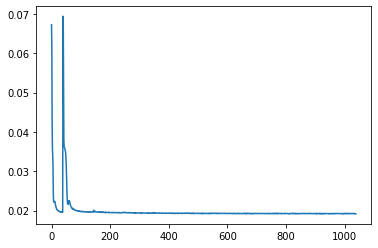

In [9]:
plt.plot(train_loss)

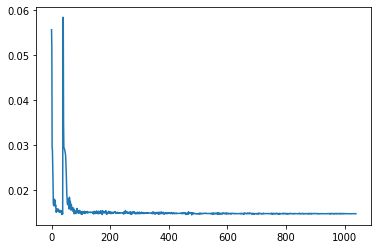

In [10]:
plt.plot(valid_loss)


In [11]:
np.argsort(train_loss)[:10]

array([ 921, 1038,  991,  955,  961,  686,  834,  889,  944,  844])

In [12]:
np.argsort(valid_loss)[:10]

array([478, 173,  35, 459, 188, 272, 102, 460, 572, 464])

In [13]:
set(np.argsort(valid_loss)[:10]) & set(np.argsort(train_loss)[:10])

set()

# TEST

In [ ]:
!python test.py \
--training-mode 'sinogram' \
--data-set 'TEST_Sinogram_DCM' \
--model-name 'ED_CNN' \
--save_dir '/workspace/sunggu/4.Dose_img2img/Predictions/Test/png/[Privious]ED_CNN/epoch_999/' \
--num_workers 4 \
--pin-mem \
--range-minus1-plus1 'False' \
--teacher_forcing "False" \
--resume '/workspace/sunggu/4.Dose_img2img/model/[Privious]ED_CNN/epoch_999_checkpoint.pth'

##### 978 epoch

In [ ]:

Original === 
PSNR avg: 54.4628 
SSIM avg: 0.9956 
RMSE avg: 7.9607


Predictions === 
PSNR avg: 57.6190 
SSIM avg: 0.9980 
RMSE avg: 5.5423
***********************************************